# PROYECTO INDIVIDUAL
## ACCIDENTES AEREOS

Los accidentes aéreos son eventos inesperados e indeseados que involucran aeronaves y se producen daños físicos a personas o a la propia aeronave. Un accidente aéreo puede involucrar cualquier tipo de aeronave, incluyendo aviones comerciales, aviones privados, helicópteros, planeadores y globos aerostáticos.

Los accidentes aéreos pueden ser causados por diversos factores, como errores humanos, fallos de equipos, problemas meteorológicos, problemas de mantenimiento, fallas en la gestión del tráfico aéreo, problemas de diseño o problemas de fabricación. Y en cuanto a sus consecuencias, pueden ser tanto en términos de pérdidas humanas como económicas.

Es por eso que la industria de la aviación, las autoridades reguladoras y los investigadores trabajan incansablemente para mejorar la seguridad de la aviación y prevenir futuros accidentes.

Por esto, el análisis de datos históricos de accidentes aéreos es fundamental para mejorar la seguridad de la aviación. La recopilación y el análisis sistemático de los datos de accidentes pueden ayudar a los investigadores a identificar patrones, tendencias y factores contribuyentes que podrían llevar a mejoras en la seguridad, desde ayudar a mejorar la capacitación de los pilotos y el personal de mantenimiento, así como a mejorar el diseño y la fabricación de aviones y equipos de aviación.

## Plan de ejecucion del presente proyecto

El análisis de datos de accidentes aéreos tiene como objetivo principal mejorar la seguridad en la aviación mediante el estudio detallado de los eventos ocurridos. A través de un enfoque sistemático, se busca identificar patrones, tendencias y factores contribuyentes que puedan ayudar a prevenir accidentes futuros. El proceso de análisis implica diversas etapas y técnicas.

En la etapa de análisis descriptivo, se obtiene un resumen estadístico de las variables numéricas clave y se visualiza la distribución de estas variables mediante histogramas y gráficos de densidad. También se realiza un conteo de ocurrencias de variables categóricas para identificar las categorías más frecuentes.

En el análisis bivariado, se examina la correlación entre variables numéricas y se evalúa la relación entre variables categóricas y numéricas relevantes. Esto permite identificar posibles relaciones y patrones entre diferentes variables.

La identificación de patrones se realiza mediante un análisis temporal, que permite identificar tendencias a lo largo del tiempo y patrones estacionales. También se emplea un análisis geográfico para visualizar la distribución espacial de los accidentes y analizar posibles factores relacionados con la ubicación.

Además, se realiza un proceso de detección de outliers y anomalías para identificar valores atípicos que puedan requerir una revisión adicional. Esto se realiza mediante el uso de boxplots, diagramas de dispersión y cálculo de z-score.

En términos de las métricas que se pueden encontrar en el análisis, algunas de ellas pueden incluir: tasa de mortalidad, índice de sobrevivencia, distribución de fatalidades, distribución geográfica de accidentes etc.

Estas métricas y análisis proporcionan una visión integral de los accidentes aéreos, ayudando a comprender los factores de riesgo, identificar áreas de mejora y respaldar la toma de decisiones para la seguridad en la aviación.

In [1]:
# Librerías a usar
import numpy as np 
import pandas as pd 
from datetime import date, timedelta, datetime
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
from PIL import Image
from geopy.geocoders import Nominatim

# 1. ANALISIS DESCRIPTIVO

## a. Carga y Exploración de Datos

In [2]:
df1 = pd.read_csv('Diccionario_datos.csv',  delimiter=';',encoding='latin1')
df1

Data_Dictionary                Renown  \
0                    fecha                  Date   
1           HORA declarada                  Time   
2                     Ruta             Location    
3                 OperadOR              Operator   
4                flight_no             Flight_No   
5                    route                Route    
6                  ac_type                  Type   
7             registration         Registration    
8                    cn_ln               Id_Nave   
9               all_aboard               Aboard    
10       PASAJEROS A BORDO   Passengers_on_Board   
11             crew_aboard           Crew_Aboard   
12  cantidad de fallecidos            Fatalities   
13    passenger_fatalities  Passenger_Fatalities   
14         crew_fatalities       Crew_Fatalities   
15                  ground                Ground   
16                 summary               Summary   

                                              Meaning  
0                                 Fecha del accidente  
1                                  Hora del accidente  
2                             Ubicación del accidente  
3                                 Aerolínea del avión  
4                                        Nro de vuelo  
5                                Ruta tomada en avión  
6                                       Tipo de avion  
7                        Registro de personas a bordo  
8                              Identificacion de Nave  
9                          Número de personas a bordo  
10                                  Pasajeros_a_bordo  
11                                Tripulacion a bordo  
12                             Cantidad de fallecidos  
13                       Número de resultados letales  
14                      Fatalidades_de_la_tripulación  
15  Total de personas muertas debido a un accident...  
16                             Breve resumen del caso

In [3]:
# Cargar los datos
df = pd.read_csv('AccidentesAviones.csv')

In [4]:
# Tipo de datos y cantidad de columnas y filas
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# Renombrado de las columnas de acuerdo al diccionario generado.
correccion= {'fecha': 'Date','HORA declarada': 'Time','Ruta':'Location',
                    'OperadOR': 'Operator','flight_no': 'Flight_No', 'route': 'Route', 
                    'ac_type': 'Type', 'registration': 'Registration', 'cn_ln': 'Id_Nave',
                    'all_aboard': 'Aboard','PASAJEROS A BORDO': 'Passengers_on_Board', 'crew_aboard':'Crew_Aboard',
                    'cantidad de fallecidos': 'Fatalities','passenger_fatalities': 'Passenger_Fatalities',
                   'crew_fatalities': 'Crew_Fatalities', 'ground': 'Ground','summary': 'Summary'}
df = df.rename(columns = correccion)
df.head(3)

Unnamed: 0                Date  Time                   Location  \
0           0  September 17, 1908  1718        Fort Myer, Virginia   
1           1  September 07, 1909     ?    Juvisy-sur-Orge, France   
2           2       July 12, 1912  0630  Atlantic City, New Jersey   

               Operator Flight_No          Route              Type  \
0  Military - U.S. Army         ?  Demonstration  Wright Flyer III   
1                     ?         ?       Air show    Wright Byplane   
2  Military - U.S. Navy         ?    Test flight         Dirigible   

  Registration Id_Nave Aboard Passengers_on_Board Crew_Aboard Fatalities  \
0            ?       1      2                   1           1          1   
1          SC1       ?      1                   0           1          1   
2            ?       ?      5                   0           5          5   

  Passenger_Fatalities Crew_Fatalities Ground  \
0                    1               0      0   
1                    0               0      0   
2                    0               5      0   

                                             Summary  
0  During a demonstration flight, a U.S. Army fly...  
1  Eugene Lefebvre was the first pilot to ever be...  
2  First U.S. dirigible Akron exploded just offsh...

In [6]:
# Eliminacion de la primera columna
df = df.drop("Unnamed: 0", axis=1)

In [7]:
# Determinando informacion de los datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  5008 non-null   object
 1   Time                  5008 non-null   object
 2   Location              5008 non-null   object
 3   Operator              5008 non-null   object
 4   Flight_No             5008 non-null   object
 5   Route                 5008 non-null   object
 6   Type                  5008 non-null   object
 7   Registration          5008 non-null   object
 8   Id_Nave               5008 non-null   object
 9   Aboard                5008 non-null   object
 10  Passengers_on_Board   5008 non-null   object
 11  Crew_Aboard           5008 non-null   object
 12  Fatalities            5008 non-null   object
 13  Passenger_Fatalities  5008 non-null   object
 14  Crew_Fatalities       5008 non-null   object
 15  Ground                5008 non-null   

In [8]:
# Determinacion de valores nulos
df.isnull().sum()

Date                    0
Time                    0
Location                0
Operator                0
Flight_No               0
Route                   0
Type                    0
Registration            0
Id_Nave                 0
Aboard                  0
Passengers_on_Board     0
Crew_Aboard             0
Fatalities              0
Passenger_Fatalities    0
Crew_Fatalities         0
Ground                  0
Summary                 0
dtype: int64

In [9]:
print(df.dtypes)

Date                    object
Time                    object
Location                object
Operator                object
Flight_No               object
Route                   object
Type                    object
Registration            object
Id_Nave                 object
Aboard                  object
Passengers_on_Board     object
Crew_Aboard             object
Fatalities              object
Passenger_Fatalities    object
Crew_Fatalities         object
Ground                  object
Summary                 object
dtype: object


In [10]:
# Verificacion de las caracteristicas estadisticas del los datos
df.describe().T

count unique              top  freq
Date                  5008   4577  August 31, 1988     4
Time                  5008   1217                ?  1504
Location              5008   4125   Moscow, Russia    16
Operator              5008   2268         Aeroflot   253
Flight_No             5008    893                ?  3682
Route                 5008   3839                ?   762
Type                  5008   2469     Douglas DC-3   333
Registration          5008   4701                ?   272
Id_Nave               5008   3908                ?   667
Aboard                5008    245                3   280
Passengers_on_Board   5008    235                0   869
Crew_Aboard           5008     35                3   954
Fatalities            5008    200                1   384
Passenger_Fatalities  5008    191                0  1040
Crew_Fatalities       5008     29                2   892
Ground                5008     52                0  4716
Summary               5008   4858                ?    59

## b. ETL Realizado a la Data

In [11]:
# Recorrer todas las columnas del DataFrame
for columna in df.columns:
    # Obtener el tipo de dato de la columna actual
    tipo_dato = df[columna].dtype
    
    # Comprobar el tipo de dato y realizar una acción en base a él
    if tipo_dato == object:
        print(f"La columna '{columna}' es de tipo string")
    elif tipo_dato == bool:
        print(f"La columna '{columna}' es de tipo booleano")
    elif tipo_dato == int:
        print(f"La columna '{columna}' es de tipo entero")
    else:
        print(f"El tipo de dato de la columna '{columna}' no es string, booleano o entero")

La columna 'Date' es de tipo string
La columna 'Time' es de tipo string
La columna 'Location' es de tipo string
La columna 'Operator' es de tipo string
La columna 'Flight_No' es de tipo string
La columna 'Route' es de tipo string
La columna 'Type' es de tipo string
La columna 'Registration' es de tipo string
La columna 'Id_Nave' es de tipo string
La columna 'Aboard' es de tipo string
La columna 'Passengers_on_Board' es de tipo string
La columna 'Crew_Aboard' es de tipo string
La columna 'Fatalities' es de tipo string
La columna 'Passenger_Fatalities' es de tipo string
La columna 'Crew_Fatalities' es de tipo string
La columna 'Ground' es de tipo string
La columna 'Summary' es de tipo string


In [12]:
# Identificación de saltos de pagina
def encontrar_saltos_de_pagina(df):
    valores_saltos_de_pagina = []
    for columna in df.columns:
        filtro = df[columna].str.contains('\r', '\n', regex=False)
        valores = df.loc[filtro, columna].unique().tolist()
        if len(valores) > 0:
            valores_saltos_de_pagina.append((columna, valores))
    return valores_saltos_de_pagina

valores_saltos_de_pagina = encontrar_saltos_de_pagina(df)
for columna, valores in valores_saltos_de_pagina:
    print(f"Saltos de página en la columna '{columna}':")
    for valor in valores:
        print(valor)
    print()

Saltos de página en la columna 'Location':
Florianopolis, Brazil
Jeddah, Saudia Arabia
Canary Islands
Moron AFB, Spain
, China
Afghanistan
Djibouti City, Djibouti
Bakou, Azerbaijan
Sarmi, Indonesia

Saltos de página en la columna 'Operator':
Avio Linee Italiane
SAVG
Bahia Taxi Aéreo

Saltos de página en la columna 'Route':
Mayfa'ah - Arden, Yemen

Saltos de página en la columna 'Type':
De Havilland DH-4
Swallow

Saltos de página en la columna 'Registration':
D-290
H-NADU
NC52
NC1062
NC282
F-AEEJ
F-AIMU
F-AJDP
F-ANBL
P-2032

Saltos de página en la columna 'Id_Nave':
3094

Saltos de página en la columna 'Summary':
conditions were poor in Ostend as well and the aircraft hit a factory chimney while flying on approach to Ostend Stene airport.  All on board were killed including the Grand Duke and Duchess of Hesse who were traveling to London for a minor royal wedding. An airport employee was blamed for not guiding the pilot down in conditions of poor visibility.
Lockheed 14s were renown as 

In [13]:
# Eliminación de saltos de página
def eliminar_saltos_de_pagina(df):
    for columna in df.columns:
        df[columna] = df[columna].str.replace('\r', '').str.replace('\n', '')
    return df

df = eliminar_saltos_de_pagina(df)

In [14]:
# Encontrar espacios, letras y caracteres especiales
def encontrar_caracteres(df, columna, caracteres):
    filtro = df[columna].str.contains('|'.join(caracteres), regex=True)
    valores_encontrados = df.loc[filtro, columna].unique().tolist()
    return valores_encontrados

columna = 'Time'  # Nombre de la columna en la que deseas buscar los caracteres
caracteres_a_buscar = ['c: ','c:','c', 'Z', ';']  # Lista de caracteres a buscar

valores_encontrados = encontrar_caracteres(df, columna, caracteres_a_buscar)
print(valores_encontrados)

['c 18:00', 'c 02:30', 'c 12:00', 'c 13:15', 'c 11:00', 'c 9:15', 'c 10:00', 'c 17:00', 'c:17:00', 'c 15:45', 'c: 2:00', 'c 16:00', 'c 08:00', 'c:09:00', 'c 13:00', 'c 20:40', 'c 23:00', 'c 09:00', 'c 20:35', 'c 15:00', 'c 11:15', 'c 01:00', '06;15', 'c 02:00', 'c 03:30', 'c 20:15', 'c 10:30', '02:09Z', 'c 20:00', 'c 13:40', '03:50Z', 'c 11:30', 'c 02:50', 'c 11:45', '17:34Z', '01:00Z', 'c 06:30', 'c 07:00', '0500Z']


In [15]:
# Eliminar los caracteres, letras y espacios vacios
def eliminar_caracteres(df, columna, caracteres):
    df[columna] = df[columna].str.replace('|'.join(caracteres), '')
    return df

columna = 'Time' 
caracteres_a_eliminar = ['c: ', 'c:', 'c', 'Z', ';']  

df = eliminar_caracteres(df, columna, caracteres_a_eliminar)
print(df[columna])

0        1718
1           ?
2        0630
3           ?
4        1830
        ...  
5003     1835
5004     1800
5005     0800
5006    11:30
5007     1500
Name: Time, Length: 5008, dtype: object


C:\Users\JHONED\AppData\Local\Temp\ipykernel_12588\580937770.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[columna] = df[columna].str.replace('|'.join(caracteres), '')


In [16]:
# Eliminacion de espacios vacios
df['Time'] = df['Time'].str.strip()

In [17]:
# Determinacion de valores de 3 digitos
filtro = df['Time'].str.len() == 3
datos_tres_caracteres = df.loc[filtro, 'Time']
datos_tres_caracteres

2140    900
3117    245
3794    175
Name: Time, dtype: object

In [18]:
# Agregar 0 alos valores de 3 digitos
filtro = df['Time'].str.len() == 3
df.loc[filtro, 'Time'] = '0' + df.loc[filtro, 'Time']

In [19]:
# Determinacion de valores de e digitos
filtro = df['Time'].str.len() == 4

datos_tres_caracteres = df.loc[filtro, 'Time']
datos_tres_caracteres

0       1718
2       0630
4       1830
5       1030
6       0100
        ... 
5002    1705
5003    1835
5004    1800
5005    0800
5007    1500
Name: Time, Length: 3296, dtype: object

In [20]:
# Se agrega : en los valores de 4 digitos
df['Time'] = df['Time'].str.replace(r'^(\d{2})(\d{2})$', r'\1:\2', regex=True)

In [21]:
# Determinacion de valores de digitos
filtro = df['Time'].str.len() == 4
datos_tres_caracteres = df.loc[filtro, 'Time']
datos_tres_caracteres

158     9:15
239     2:00
1337    0:00
2825    1:02
3011    1:35
3044    00:7
4180    11:3
Name: Time, dtype: object

In [22]:
# Cambio de valores encontrados
df['Time'] = df['Time'].str.replace('9:15', '09:15')
df['Time'] = df['Time'].str.replace('2:00', '02:00')
df['Time'] = df['Time'].str.replace('0:00', '00:00')
df['Time'] = df['Time'].str.replace('1:02', '01:02')
df['Time'] = df['Time'].str.replace('1:35', '01:35')
df['Time'] = df['Time'].str.replace('00:7', '00:70')
df['Time'] = df['Time'].str.replace('11:3', '11:30')

In [23]:
# Determinacion de valores de digitos
filtro = df['Time'].str.len() == 6

datos_tres_caracteres = df.loc[filtro, 'Time']
datos_tres_caracteres

22      100:00
95      102:00
132     100:00
160     11:300
169     100:00
         ...  
4971    11:300
4988    002:00
4991    009:15
4996    200:00
5006    11:300
Name: Time, Length: 165, dtype: object

In [24]:
# Buscar valores con 6 digitos
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('0'))
datos_filtrados = df[filtro]['Time']
datos_filtrados

280     002:00
605     002:00
612     009:15
722     002:00
738     000:00
822     002:00
886     009:15
887     002:00
1057    009:15
1259    002:00
1583    001:35
1917    002:00
2020    002:00
2396    002:00
2621    002:00
2667    009:15
2716    002:00
3229    009:15
3626    002:00
3666    009:15
3709    002:00
4386    009:15
4614    002:00
4752    002:00
4838    009:15
4988    002:00
4991    009:15
Name: Time, dtype: object

In [25]:
# Se elimina el primer valor de este filtro
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('0'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str.slice(start=1)
datos_filtrados = df[filtro]['Time']

In [26]:
# Determinacion de valores de 6 digitos
filtro = df['Time'].str.len() == 6
datos_tres_caracteres = df.loc[filtro, 'Time']
datos_tres_caracteres

22      100:00
95      102:00
132     100:00
160     11:300
169     100:00
         ...  
4867    11:308
4940    202:00
4971    11:300
4996    200:00
5006    11:300
Name: Time, Length: 138, dtype: object

In [27]:
# Determinacion de digitos que son de la forma 100:00
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('100:00'))
datos_filtrados = df[filtro]['Time']
datos_filtrados

22      100:00
132     100:00
169     100:00
406     100:00
577     100:00
831     100:00
857     100:00
1617    100:00
2104    100:00
3137    100:00
3439    100:00
3511    100:00
3812    100:00
4560    100:00
4585    100:00
4768    100:00
Name: Time, dtype: object

In [28]:
# Eliminar el segundo digito
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('102:00'))
def eliminar_segundo_digito(valor):
    return valor[:1] + valor[2:]
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].apply(eliminar_segundo_digito)

In [29]:
# determinacion de digitos que son de la forma 11:300 se elimina el ultimo digito
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('11:300'))
datos_filtrados = df[filtro]['Time']
datos_filtrados = datos_filtrados.str[:-1]
datos_filtrados

160     11:30
189     11:30
599     11:30
814     11:30
1125    11:30
1651    11:30
2041    11:30
2305    11:30
2471    11:30
2476    11:30
2983    11:30
3393    11:30
3422    11:30
3461    11:30
3935    11:30
4162    11:30
4200    11:30
4453    11:30
4610    11:30
4758    11:30
4971    11:30
5006    11:30
Name: Time, dtype: object

In [30]:
# Determinacion de valores de 6 digitos
filtro = df['Time'].str.len() == 6

datos_tres_caracteres = df.loc[filtro, 'Time']
datos_tres_caracteres

22      100:00
132     100:00
160     11:300
169     100:00
189     11:300
         ...  
4867    11:308
4940    202:00
4971    11:300
4996    200:00
5006    11:300
Name: Time, Length: 106, dtype: object

In [31]:
# Eliminar primer valor de cada dato en la columna 'Time'
df['Time'] = df['Time'].str[1:]
# Eliminar último dígito de los datos filtrados en la columna 'Time'
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('11:300'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str[:-1]
# Eliminar último dígito de los datos filtrados en la columna 'Time'
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('11:300'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str[:-1]
# Eliminar segundo dígito de los datos filtrados en la columna 'Time'
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('100:00'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str[:1] + df.loc[filtro, 'Time'].str[2:]
# Eliminar segundo dígito de los datos filtrados en la columna 'Time'
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('200:00'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str[:1] + df.loc[filtro, 'Time'].str[2:]
# Eliminar segundo dígito de los datos filtrados en la columna 'Time'
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('202:00'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str[:2] + df.loc[filtro, 'Time'].str[3:]
# Eliminar segundo dígito de los datos filtrados en la columna 'Time'
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('101:35'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str[:2] + df.loc[filtro, 'Time'].str[3:]
# Eliminar segundo dígito de los datos filtrados en la columna 'Time'
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('101:02'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str[:2] + df.loc[filtro, 'Time'].str[3:]
# Eliminar segundo dígito de los datos filtrados en la columna 'Time'
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('201:35'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str[:2] + df.loc[filtro, 'Time'].str[3:]
# Eliminar segundo dígito de los datos filtrados en la columna 'Time'
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('202:00'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str[:2] + df.loc[filtro, 'Time'].str[3:]
# Eliminar quinto dígito de los datos filtrados en la columna 'Time'
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('11:303'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str[:4] + df.loc[filtro, 'Time'].str[5:]
# Eliminar quinto dígito de los datos filtrados en la columna 'Time'
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('11:309'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str[:4] + df.loc[filtro, 'Time'].str[5:]
# Eliminar quinto dígito de los datos filtrados en la columna 'Time'
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('11:306'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str[:4] + df.loc[filtro, 'Time'].str[5:]
# Eliminar quinto dígito de los datos filtrados en la columna 'Time'
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('11:307'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str[:4] + df.loc[filtro, 'Time'].str[5:]
# Eliminar quinto dígito de los datos filtrados en la columna 'Time'
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('11:308'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str[:4] + df.loc[filtro, 'Time'].str[5:]
# Eliminar quinto dígito de los datos filtrados en la columna 'Time'
filtro = (df['Time'].str.len() == 6) & (df['Time'].str.startswith('11:304'))
df.loc[filtro, 'Time'] = df.loc[filtro, 'Time'].str[:4] + df.loc[filtro, 'Time'].str[5:]

In [32]:
# Determinacion de valores de 6 digitos
filtro = df['Time'].str.len() == 6

datos_tres_caracteres = df.loc[filtro, 'Time']
datos_tres_caracteres

Series([], Name: Time, dtype: object)

In [33]:
# Cambiar los valores NaN por 00:00
df['Time'] = df['Time'].replace(np.nan, '00:00') 

In [34]:
# Crear nueva columna llamada 'DataTime' que contendrá los valores de la fecha y la hora combinadas
df['DataTime'] = df['Date'] + ' ' + df['Time']

In [35]:
# Cambio de valores "?" por una "nombre" en columnas categoricas o por "0" si es numerico la columna
df['Route'] = df['Route'].str.replace('?', 'Not defined')
df['Summary'] = df['Summary'].str.replace('?', 'Not defined')
df['Operator'] = df['Operator'].str.replace('?', 'Not defined')
df['Type'] = df['Type'].str.replace('?', 'Not defined')
df['Flight_No'] = df['Flight_No'].str.replace('?', 'Not defined')
df['Id_Nave'] = df['Id_Nave'].str.replace('?', 'Not defined')
df['Registration'] = df['Registration'].str.replace('?', 'Not defined')
df['Passengers_on_Board'] = df['Passengers_on_Board'].replace('?', '0')
df['Crew_Aboard'] = df['Crew_Aboard'].replace('?', '0')
df['Fatalities'] = df['Fatalities'].replace('?', '0')
df['Passenger_Fatalities'] = df['Passenger_Fatalities'].replace('?', '0')

C:\Users\JHONED\AppData\Local\Temp\ipykernel_12588\197157746.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Route'] = df['Route'].str.replace('?', 'Not defined')
C:\Users\JHONED\AppData\Local\Temp\ipykernel_12588\197157746.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Summary'] = df['Summary'].str.replace('?', 'Not defined')
C:\Users\JHONED\AppData\Local\Temp\ipykernel_12588\197157746.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Operator'] = df['Operator'].str.replace('?', 'Not defined')
C:\

In [36]:
# Eliminamos las columnas que no nos interesan
df.drop(['Flight_No', 'Registration', 'Id_Nave', 'Time'], inplace=True, axis=1)
# Cambiamos el tipo de dato y realizamos los calculos para obtener los sobrevivientes
df['Aboard'] = pd.to_numeric(df['Aboard'], errors='coerce')
df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce')
df['Survived'] = df['Aboard'] - df['Fatalities']
# Calculo del ratio de sobrevientes
df["Survival Rate"] = 100 * (df["Survived"]) / df["Aboard"]
# Creamos una columna indicando que es militar o no el avion siniestrado
df["Is Military"] = df['Operator'].str.contains("Military",regex=False)
# Extrayendo los paises de estudio
df['Location Country']  = df['Location'].str.split(',').str[-1].str.strip().str.upper()
# Conviertiendo la columna Date a datetime
df['Date'] = pd.to_datetime(df['Date'])
# Cambiando la Fecha como indice
df_date_index=df.set_index('Date')

In [37]:
# Se crean de nuevas columnas year, month y day
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Decade'] = (df['Year']) // 10 * 10
df['Date of Year'] = df['Month'].astype(str) +'/'+ df['Day'].astype(str)
df['Day of Week'] = pd.DatetimeIndex(df['Date']).day_name()

## c. Distribución de Variables Numéricas

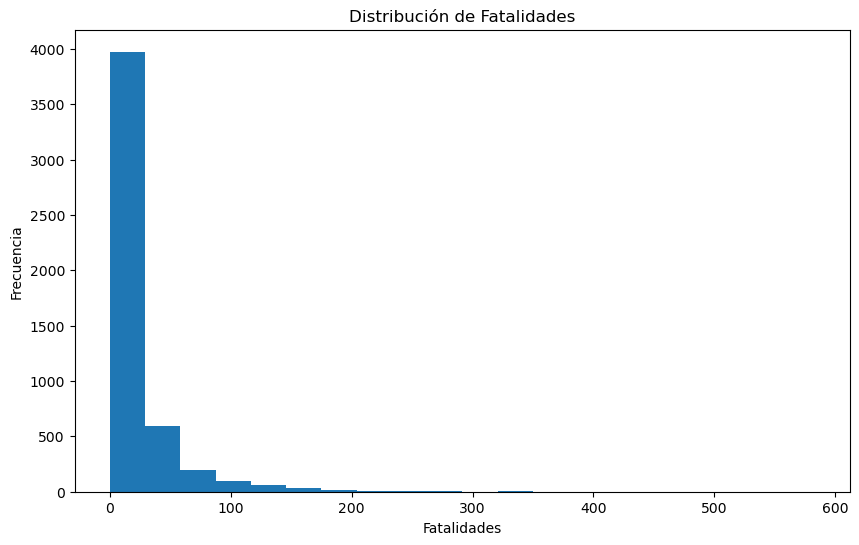

In [38]:
# Histograma de la variable 'Fatalities'
plt.figure(figsize=(10, 6))
plt.hist(df['Fatalities'], bins=20)
plt.xlabel('Fatalidades')
plt.ylabel('Frecuencia')
plt.title('Distribución de Fatalidades')
plt.show()

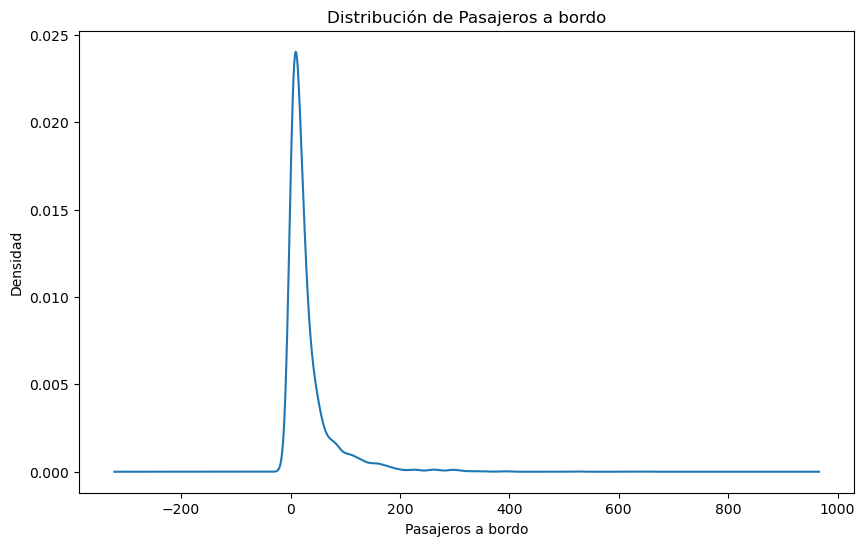

In [39]:


# Gráfico de densidad de la variable 'Aboard'
plt.figure(figsize=(10, 6))
df['Aboard'].plot(kind='density')
plt.xlabel('Pasajeros a bordo')
plt.ylabel('Densidad')
plt.title('Distribución de Pasajeros a bordo')
plt.show()

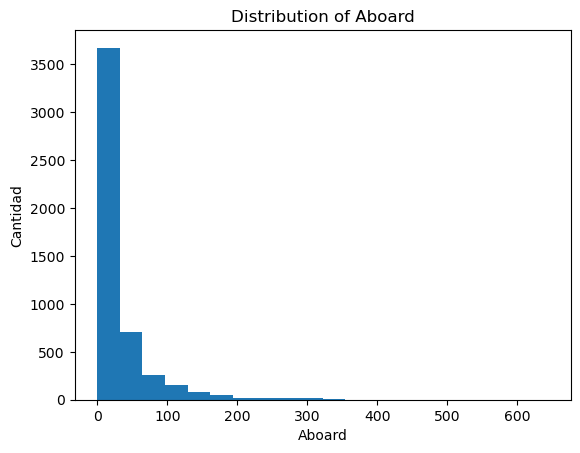

In [40]:
# Distribución de la variable 'Aboard'
import matplotlib.pyplot as plt
plt.hist(df['Aboard'], bins=20)
plt.xlabel('Aboard')
plt.ylabel('Cantidad')
plt.title('Distribution of Aboard')
plt.show()

## d. Conteo de Variables Categoricas

In [41]:
# Conteo de ocurrencias de la variable 'Operator'
operator_counts = df['Operator'].value_counts()
operator_counts

Aeroflot                            253
Military - U.S. Air Force           141
Air France                           74
Deutsche Lufthansa                   63
United Air Lines                     44
                                   ... 
Sierra Pacific Airlines               1
Pathet Lao Airlines                   1
Military - West German Air Force      1
Cessnyca                              1
Kamchatka Aviation Enterprise         1
Name: Operator, Length: 2268, dtype: int64

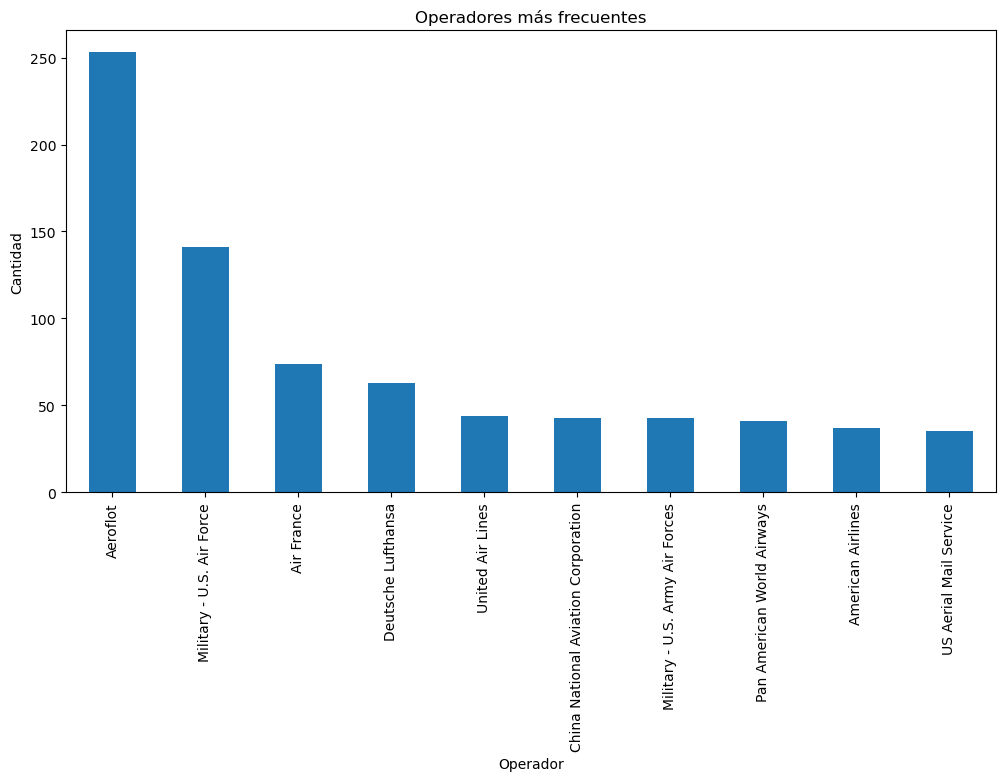

In [42]:
# Gráfico de barras de los operadores más frecuentes
plt.figure(figsize=(12, 6))
operator_counts.head(10).plot(kind='bar')
plt.xlabel('Operador')
plt.ylabel('Cantidad')
plt.title('Operadores más frecuentes')
plt.show()

In [43]:
# Conteo de ocurrencias de la variable 'Type'
type_counts = df['Type'].value_counts()
type_counts

Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Douglas DC-4                                 41
                                           ... 
Vickers Viscount 759D                         1
H-21B                                         1
Avro 685 York C1                              1
Piper PA-24-250 Comanche                      1
Antonov An 26B-100                            1
Name: Type, Length: 2469, dtype: int64

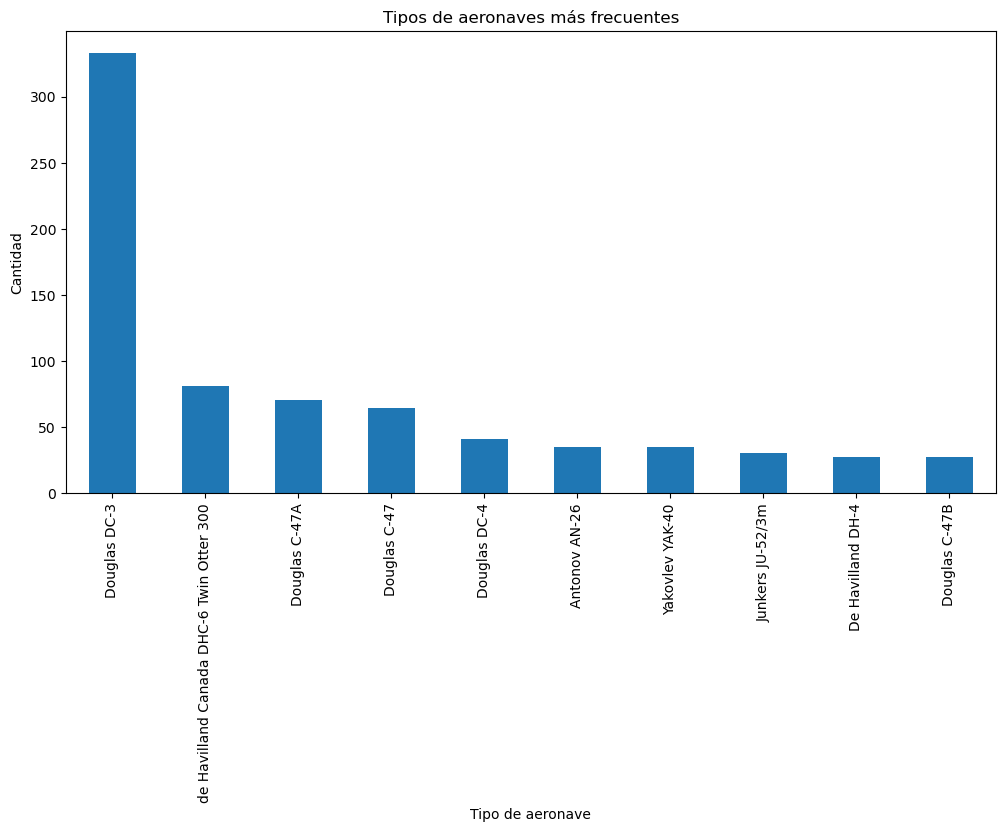

In [44]:
# Gráfico de barras de los tipos de aeronaves más frecuentes
plt.figure(figsize=(12, 6))
type_counts.head(10).plot(kind='bar')
plt.xlabel('Tipo de aeronave')
plt.ylabel('Cantidad')
plt.title('Tipos de aeronaves más frecuentes')
plt.show()

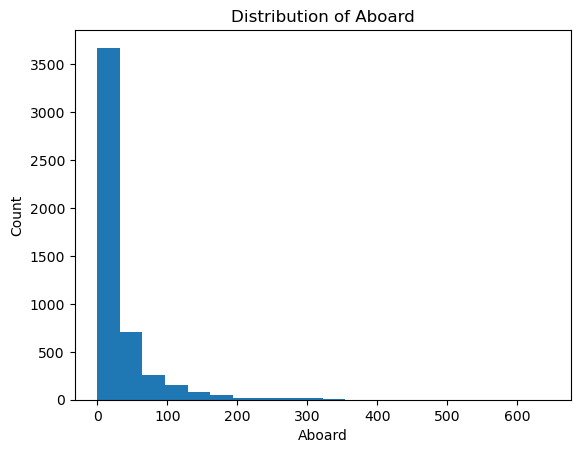

In [45]:
# Distribución de la variable 'Fatalities'
import matplotlib.pyplot as plt
plt.hist(df['Aboard'], bins=20)
plt.xlabel('Aboard')
plt.ylabel('Count')
plt.title('Distribution of Aboard')
plt.show()

Aeroflot                            253
Military - U.S. Air Force           141
Air France                           74
Deutsche Lufthansa                   63
United Air Lines                     44
                                   ... 
Sierra Pacific Airlines               1
Pathet Lao Airlines                   1
Military - West German Air Force      1
Cessnyca                              1
Kamchatka Aviation Enterprise         1
Name: Operator, Length: 2268, dtype: int64


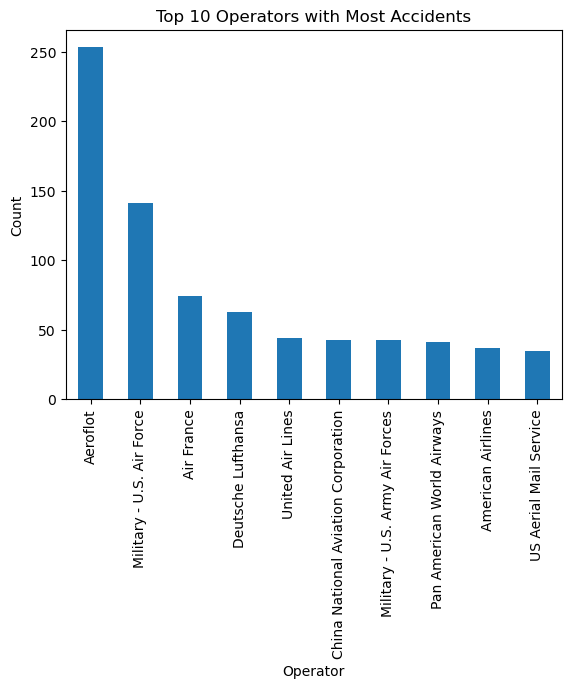

In [46]:
# Conteo de valores únicos en la variable 'Operator'
print(df['Operator'].value_counts())

# Gráfico de barras de los operadores con mayor número de accidentes
top_operators = df['Operator'].value_counts().head(10)
top_operators.plot(kind='bar')
plt.xlabel('Operator')
plt.ylabel('Count')
plt.title('Top 10 Operators with Most Accidents')
plt.show()

# 2. ANALISIS  BIVARIADO

## a. Correlacion entre Variables Numericas

In [47]:
# Identificacion de columnas categoricas y numericas
numerical_columns = {'Aboard', 'Fatalities'}
categorical_columns = {'Location', 'Operator', 'Route', 'Type', 
                       'Passengers_on_Board', 'Crew_Aboard',
       'Passenger_Fatalities', 'Crew_Fatalities', 'Ground', 'Summary',
       'DataTime'}

In [49]:
# Matriz de correlacion
correlation_matrix = df[numerical_columns].corr()

C:\Users\JHONED\AppData\Local\Temp\ipykernel_12588\4086006094.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  correlation_matrix = df[numerical_columns].corr()


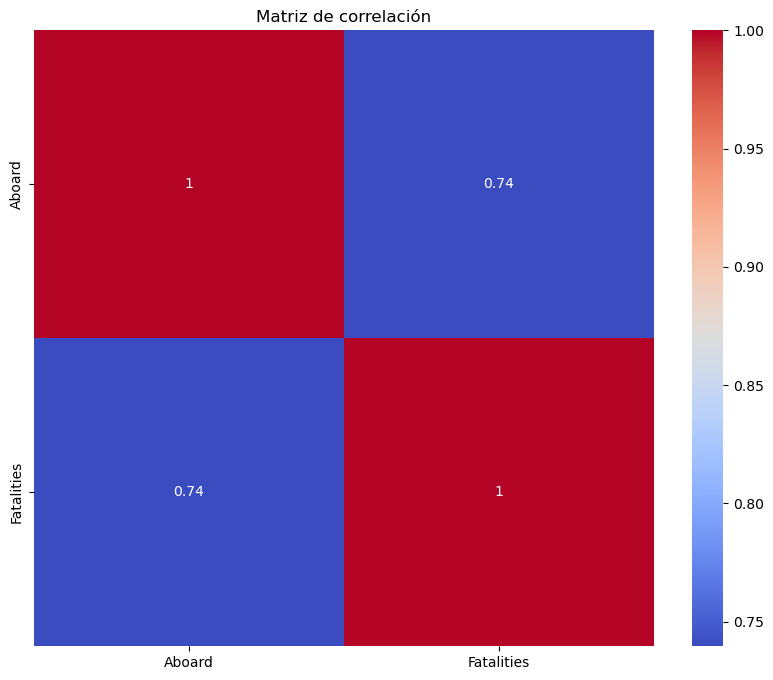

In [50]:
# Matriz de correlación mediante un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

C:\Users\JHONED\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


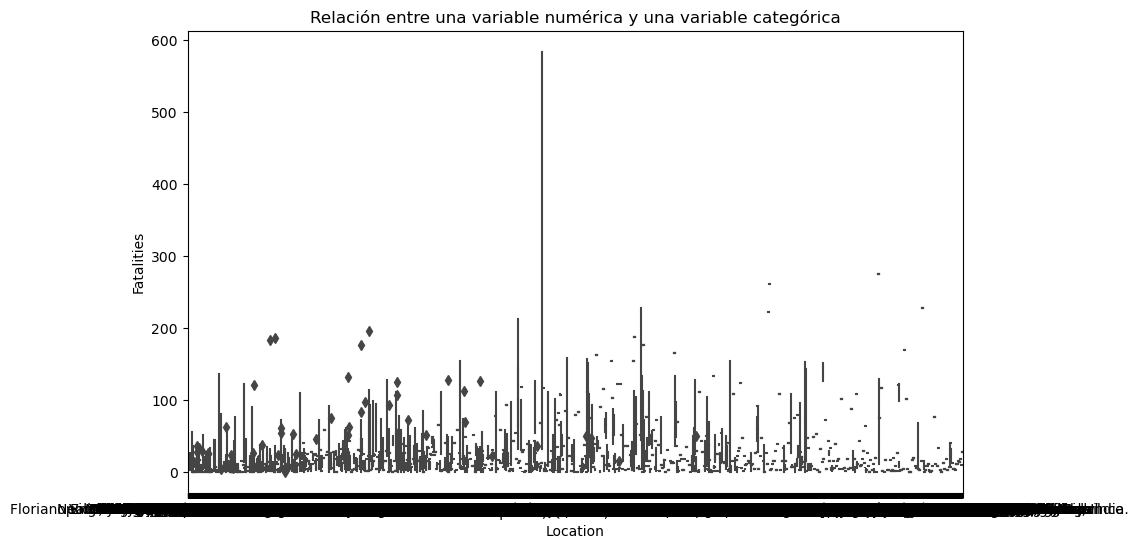

In [51]:
# Distribución de las fatalidades para cada ubicación y detectar si hay alguna diferencia significativa entre ellas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Fatalities', data=df)
plt.title('Relación entre una variable numérica y una variable categórica')
plt.show()

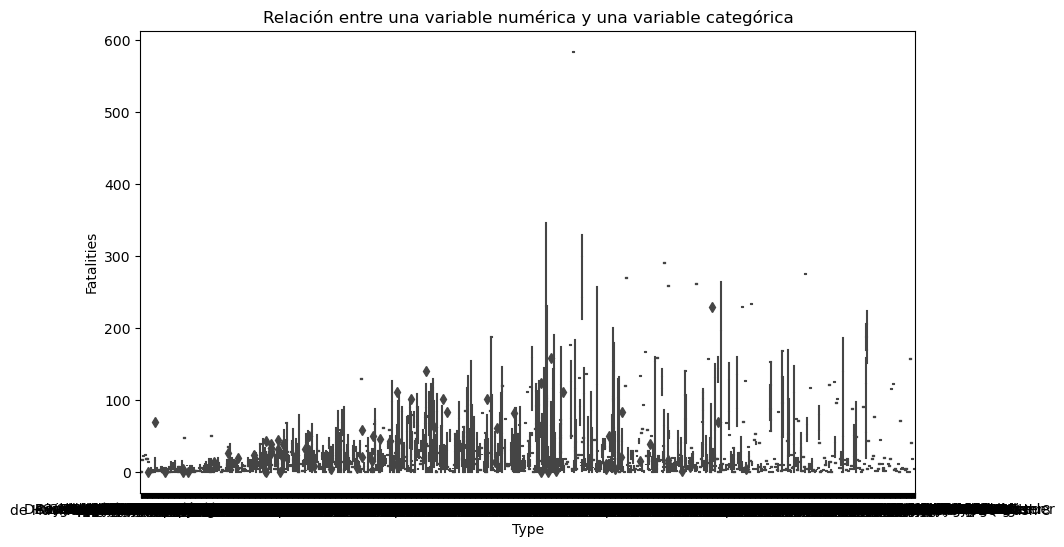

In [52]:
# Distribución de fatalidades entre los diferentes tipos de accidentes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Fatalities', data=df)
plt.title('Relación entre una variable numérica y una variable categórica')
plt.show()

In [53]:
# Distribuyen las fatalidades en función de la ubicación de los accidentes
contingency_table = pd.crosstab(df['Location'], df['Fatalities'])
print(contingency_table)

Fatalities                             0    1    2    3    4    5    6    7    \
Location                                                                        
1,200 miles off Dakar, Atlantic Ocean    0    0    0    0    0    0    0    0   
110 miles SW of Sochi, Russia            0    0    0    0    0    0    0    0   
125 miles ENE of Tokyo, Japan            0    0    0    0    0    0    1    0   
175 miles off the Egyptian coast         0    0    0    0    0    0    0    0   
200 miles NE of Derby, Australia         0    0    0    0    1    0    0    0   
...                                    ...  ...  ...  ...  ...  ...  ...  ...   
Zhengzhou-Xinzheng, China                0    1    0    0    0    0    0    0   
Zifta, Egypt                             0    0    0    0    1    0    0    0   
Zurich, Switzerland                      0    1    0    0    0    0    1    0   
Zwingle, Iowa                            0    0    0    0    0    0    0    0   
near Craigavad, Northern Ire

C:\Users\JHONED\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


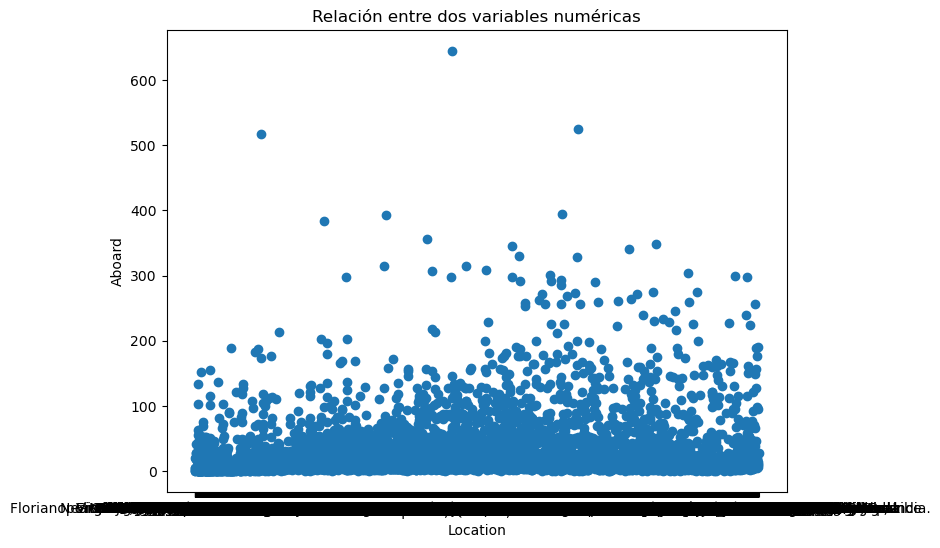

In [54]:
# Ubicación y cantidad de personas a bordo de un accidente en particular.
plt.figure(figsize=(8, 6))
plt.scatter(df['Location'], df['Aboard'])
plt.xlabel('Location')
plt.ylabel('Aboard')
plt.title('Relación entre dos variables numéricas')
plt.show()

C:\Users\JHONED\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\JHONED\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\JHONED\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\JHONED\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


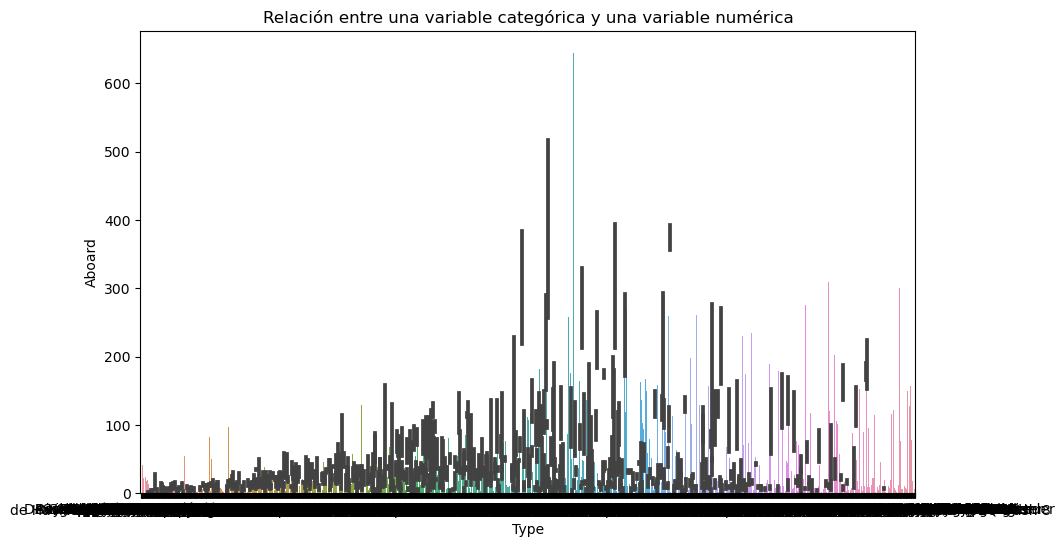

In [57]:
# Relación entre una variable categórica ('Type') y una variable numérica ('Aboard')
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Aboard', data=df)
plt.title('Relación entre una variable categórica y una variable numérica')
plt.show()

cada barra representa una categoría de la variable categórica en el eje x ('Type'), y la altura de la barra representa el valor promedio de la variable numérica en el eje y ('Aboard') para esa categoría.

            Fatalities    Aboard
Fatalities    1.000000  0.739646
Aboard        0.739646  1.000000


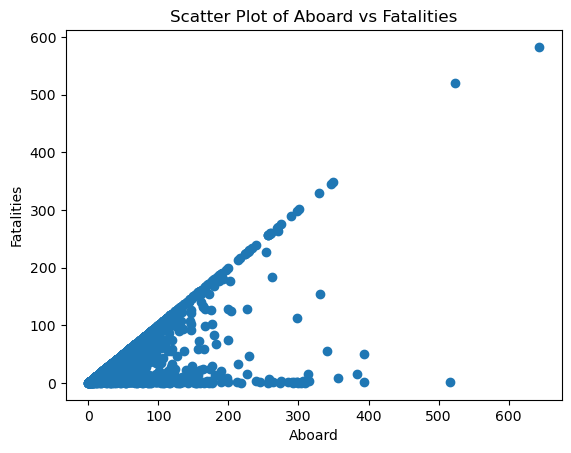

In [55]:
# Matriz de correlación
correlation_matrix = df[['Fatalities', 'Aboard']].corr()
print(correlation_matrix)

# Gráfico de dispersión entre 'Fatalities' y 'Aboard'
plt.scatter(df['Aboard'], df['Fatalities'])
plt.xlabel('Aboard')
plt.ylabel('Fatalities')
plt.title('Scatter Plot of Aboard vs Fatalities')
plt.show()

# 3. IDENTIFICACION DE PATRONES

## a. Analisis Temporal

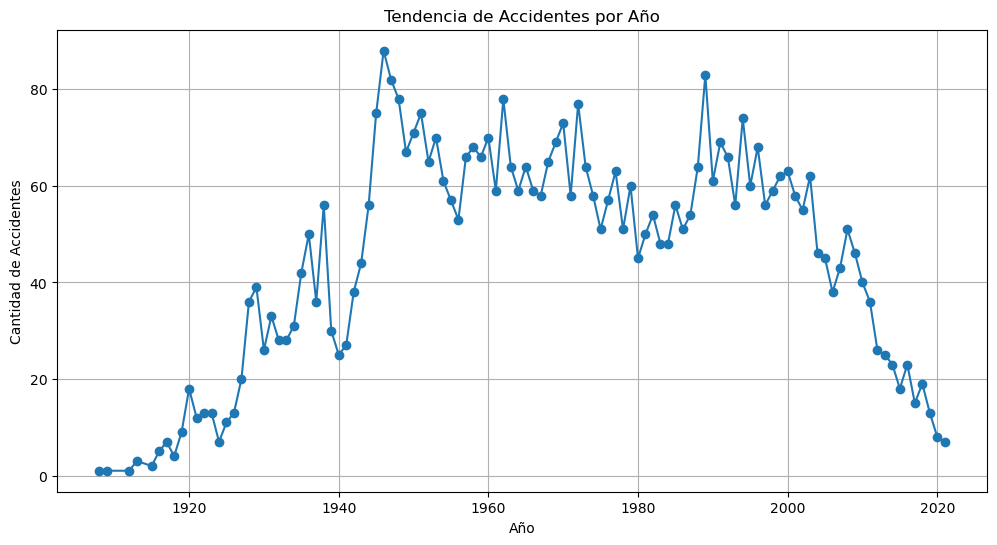

In [57]:
# Cantidad de accidentes por año
accidents_by_year = df.groupby('Year').size()

# Gráfico cantidad de accidentes por año
plt.figure(figsize=(12, 6))
accidents_by_year.plot(kind='line', marker='o')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.title('Tendencia de Accidentes por Año')
plt.grid(True)
plt.show()

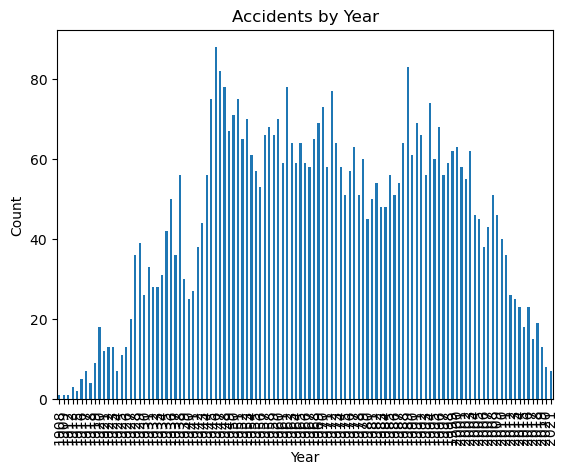

In [58]:
# Convertir la columna 'Date' a formato de fecha
df['Date'] = pd.to_datetime(df['Date'])

# Crear una nueva columna 'Year'
df['Year'] = df['Date'].dt.year

# Conteo de accidentes por año
accidents_by_year = df['Year'].value_counts().sort_index()

# Gráfico de barras de accidentes por año
accidents_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Accidents by Year')
plt.show()

## b. Analisis Geografico

In [59]:
# Recuento de ocurrencias para cada ubicación
location_counts = df['Location'].value_counts()
location_counts

Moscow, Russia                                         16
Manila, Philippines                                    15
New York, New York                                     14
Sao Paulo, Brazil                                      13
Cairo, Egypt                                           13
                                                       ..
NAS Argentia, Placentia Bay,  Newfoundland,  Canada     1
Anzio, Italy                                            1
Nipe Bay, Cuba                                          1
Near Roccatamburo di Poggiodomo, Italy                  1
Palana, Russia                                          1
Name: Location, Length: 4125, dtype: int64

In [60]:
# Ubicaciones con mayor frecuencia
# Seleccionamos las 10 ubicaciones con mayor frecuencia
top_locations = location_counts.head(10)  
top_locations

Moscow, Russia            16
Manila, Philippines       15
New York, New York        14
Sao Paulo, Brazil         13
Cairo, Egypt              13
Bogota, Colombia          12
Rio de Janeiro, Brazil    12
Near Moscow, Russia       11
Chicago, Illinois         11
Tehran, Iran              10
Name: Location, dtype: int64

# 4. IDENTIFICACION DE OUTLIERS Y ANOMALIAS

## a. Boxplots y Diagramas de Dispersión

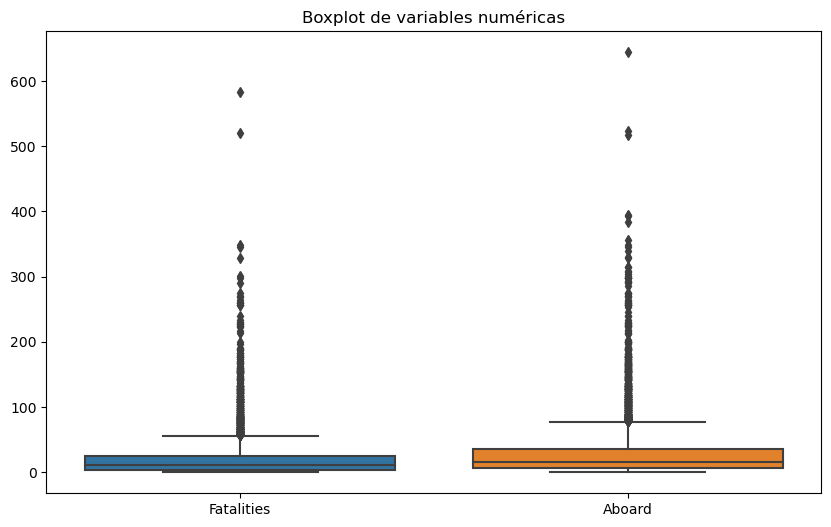

In [61]:
# Identificacion de outliers en boxplot para las variables 'Fatalities' y 'Aboard'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Fatalities', 'Aboard']])
plt.title('Boxplot de variables numéricas')
plt.show()

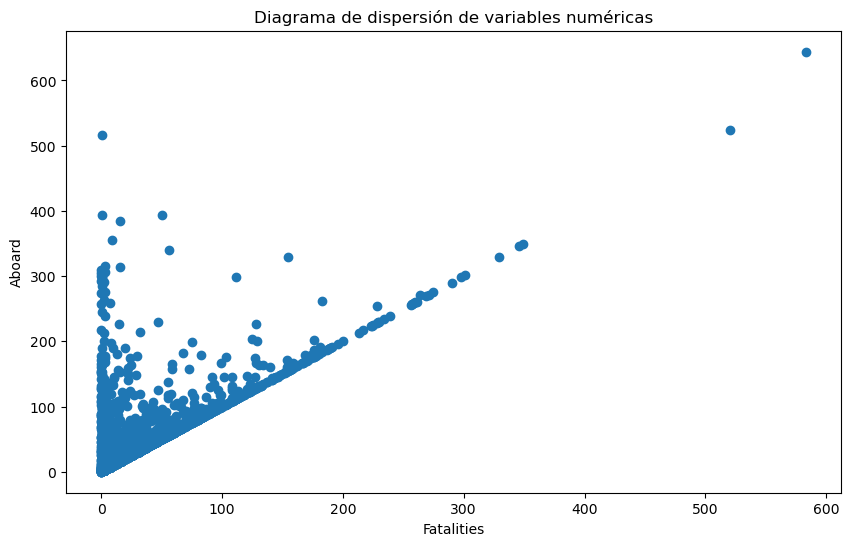

In [62]:
# Generar un diagrama de dispersión para dos variables numéricas
plt.figure(figsize=(10, 6))
plt.scatter(df['Fatalities'], df['Aboard'])
plt.xlabel('Fatalities')
plt.ylabel('Aboard')
plt.title('Diagrama de dispersión de variables numéricas')
plt.show()

# b. Z-Score y Análisis de Anomalías

In [63]:
# Calcular el z-score para las variables numéricas
# Calcular el z-score para las variables numéricas
num_vars = ['Fatalities', 'Aboard']  # Variables numéricas relevantes
df_zscore = df[num_vars].apply(lambda x: (x - x.mean()) / x.std())
df_zscore['ZScore'] = np.sqrt(df_zscore['Fatalities']**2 + df_zscore['Aboard']**2)


In [64]:
umbral = 2  # Umbral para detectar anomalías

# Identificar las anomalías
anomalias = df_zscore[df_zscore['ZScore'] > umbral]

# Mostrar las observaciones que son anomalías
print(anomalias)

      Fatalities    Aboard    ZScore
1165    1.650527  1.140695  2.006346
1360    1.850620  1.844302  2.612708
1405    3.051177  2.152130  3.733811
1580    3.022593  2.130142  3.697779
1613   -0.007386  2.811761  2.811770
...          ...       ...       ...
4983    3.851549  2.767785  4.742896
4994    4.394658  3.185552  5.427777
4995   -0.550495  3.207539  3.254436
4997    2.136467  1.492499  2.606155
4998   -0.064555  3.493380  3.493976

[385 rows x 3 columns]


In [65]:
# Identificación de registros con Aboard fuera del rango esperado
outliers = df[df['Aboard'] > 500]
print(outliers)

           Date                               Location  \
2902 1977-03-27               Tenerife, Canary Islands   
3341 1985-08-12  Mt. Osutaka, near Ueno Village, Japan   
4219 1999-07-23                           Tokyo, Japan   

                              Operator  \
2902  Pan American World Airways / KLM   
3341                   Japan Air Lines   
4219                All Nippon Airways   

                                              Route  \
2902  Tenerife - Las Palmas / Tenerife - Las Palmas   
3341                                  Tokyo - Osaka   
4219                  Tokyo, Japan - Chitose, Japan   

                                      Type  Aboard Passengers_on_Board  \
2902  Boeing B-747-121 / Boeing B-747-206B   644.0                 614   
3341                     Boeing B-747-SR46   524.0                 509   
4219                          Boeing B-747   517.0                 503   

     Crew_Aboard  Fatalities Passenger_Fatalities  ... Survived Survival Rate  \

# Nube de palabras en la columna "Summary"

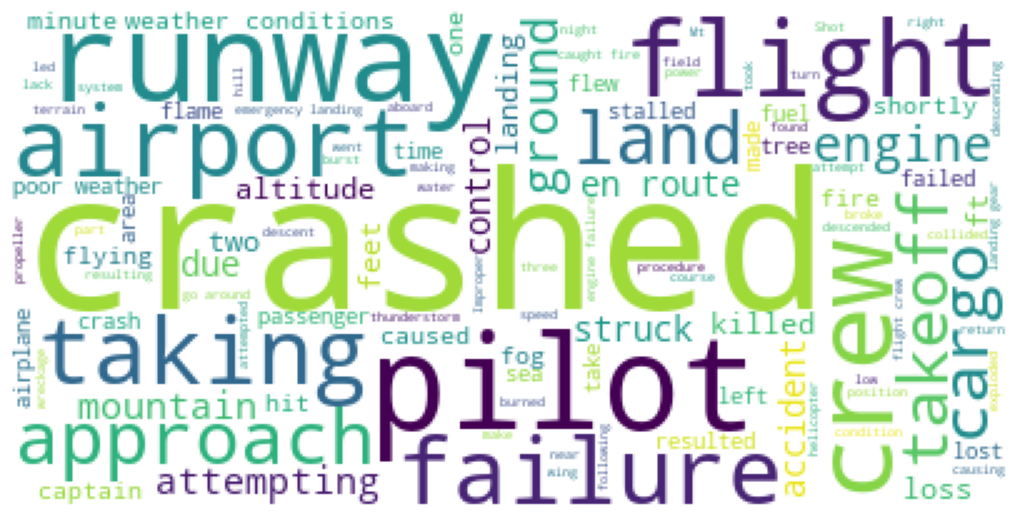

In [66]:
# Combinar todos los textos de la columna 'Summary' en un solo string
text2 = ' '.join(df['Summary'].dropna().tolist())

# Crear el objeto de WordCloud
stopwords2 = set(STOPWORDS)
stopwords2.add('aircraft')
stopwords2.add('plane')
stopwords2.add('nan')
wordcloud2 = WordCloud(background_color="white", max_words=200, stopwords=stopwords2)
wordcloud2.generate(text2)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Nube de palabras para la columna Location

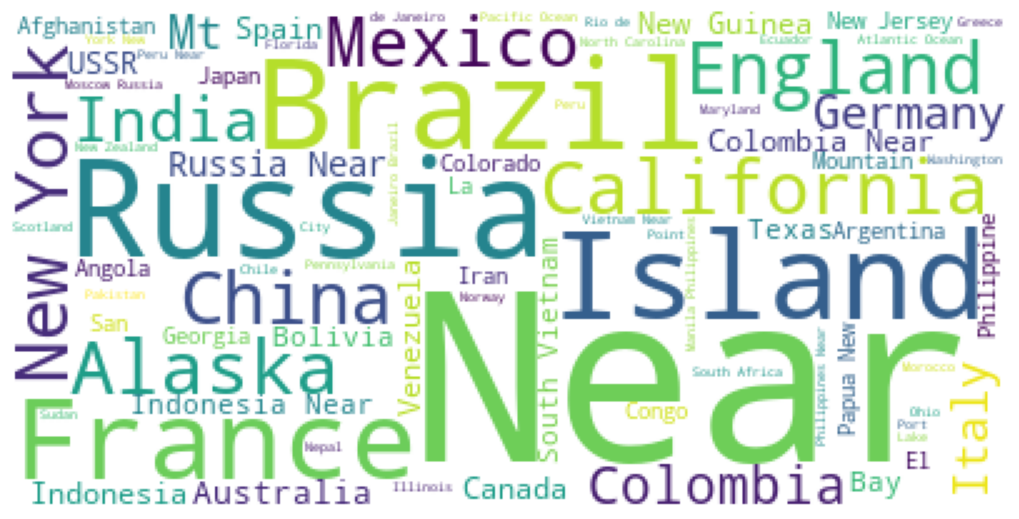

In [67]:
# Combinar todos los textos de la columna 'location' en un solo string
text2 = ' '.join(df['Location'].dropna().tolist())

# Crear el objeto de WordCloud
stopwords2 = set(STOPWORDS)
stopwords2.add('aircraft')
stopwords2.add('plane')
stopwords2.add('nan')
wordcloud2 = WordCloud(background_color="white", max_words=200, stopwords=stopwords2)
wordcloud2.generate(text2)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Nube de palabras para la columna Operator

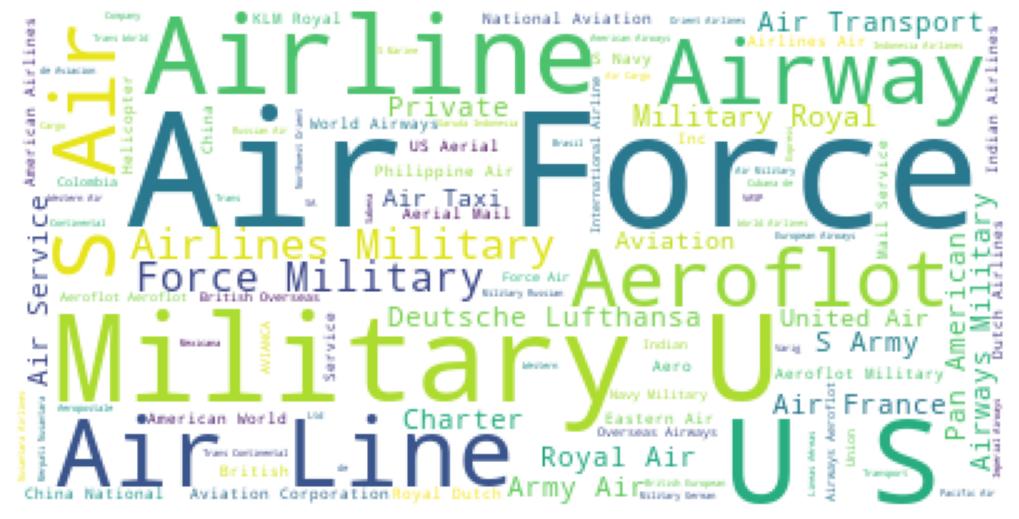

In [68]:
# Combinar todos los textos de la columna 'Operator' en un solo string
text2 = ' '.join(df['Operator'].dropna().tolist())

# Crear el objeto de WordCloud
stopwords2 = set(STOPWORDS)
stopwords2.add('aircraft')
stopwords2.add('plane')
stopwords2.add('nan')
wordcloud2 = WordCloud(background_color="white", max_words=200, stopwords=stopwords2)
wordcloud2.generate(text2)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Nube de palabras para la columna Route

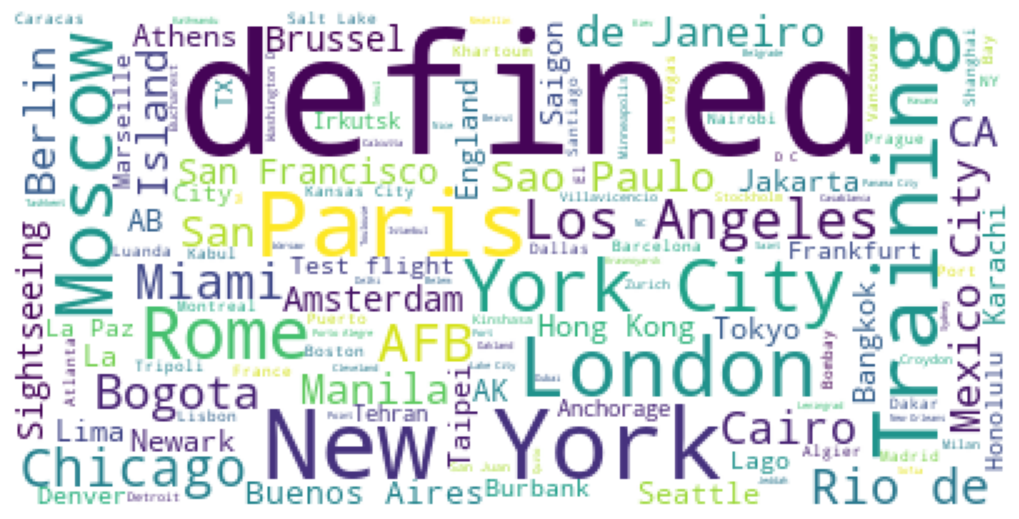

In [69]:
# Combinar todos los textos de la columna 'Route' en un solo string
text2 = ' '.join(df['Route'].dropna().tolist())

# Crear el objeto de WordCloud
stopwords2 = set(STOPWORDS)
stopwords2.add('aircraft')
stopwords2.add('plane')
stopwords2.add('nan')
wordcloud2 = WordCloud(background_color="white", max_words=200, stopwords=stopwords2)
wordcloud2.generate(text2)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

 # Nube de palabras para la columna Type

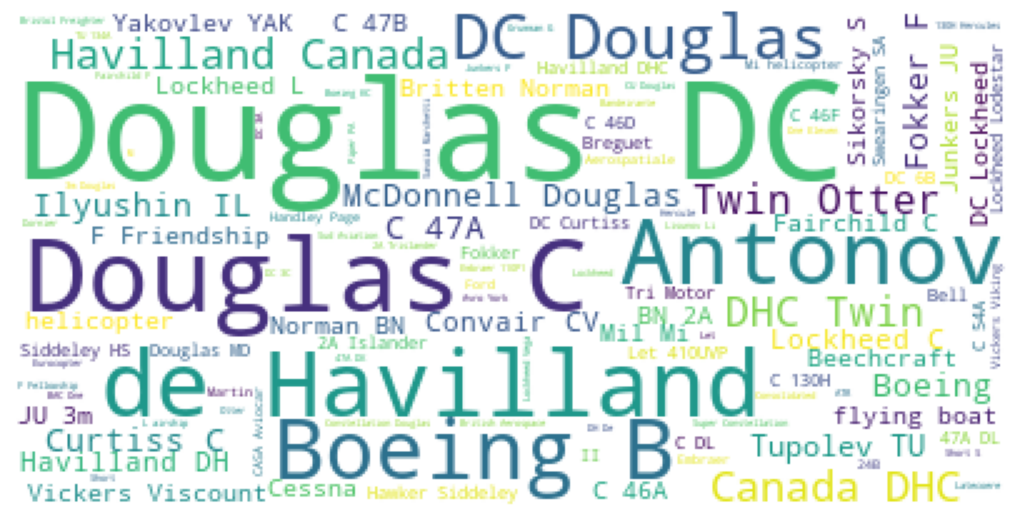

In [70]:
# Combinar todos los textos de la columna 'Type' en un solo string
text2 = ' '.join(df['Type'].dropna().tolist())

# Crear el objeto de WordCloud
stopwords2 = set(STOPWORDS)
stopwords2.add('aircraft')
stopwords2.add('plane')
stopwords2.add('nan')
wordcloud2 = WordCloud(background_color="white", max_words=200, stopwords=stopwords2)
wordcloud2.generate(text2)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [71]:
# Total de personas por año
total_people_per_year = df.groupby('Year')['Aboard'].sum()
total_people_per_year

Year
1908       2.0
1909       1.0
1912       5.0
1913      49.0
1915      60.0
         ...  
2017     245.0
2018    1239.0
2019     432.0
2020     703.0
2021     227.0
Name: Aboard, Length: 111, dtype: float64

In [72]:
# Fallecidos por año
total_fatalities_per_year = df[df['Fatalities'] > 0].groupby('Year')['Fatalities'].sum()
total_fatalities_per_year

Year
1908      1
1909      1
1912      5
1913     43
1915     36
       ... 
2017    214
2018    874
2019    305
2020    355
2021    178
Name: Fatalities, Length: 111, dtype: int64

In [73]:
# Tasa de mortalidad por año (número de fallecidos / número total de personas)
mortality_rate_per_year = (total_fatalities_per_year / total_people_per_year) * 100
mortality_rate_per_year

Year
1908     50.000000
1909    100.000000
1912    100.000000
1913     87.755102
1915     60.000000
           ...    
2017     87.346939
2018     70.540759
2019     70.601852
2020     50.497866
2021     78.414097
Length: 111, dtype: float64

In [74]:
# Tasa de mortalidad por año (número de fallecidos / número total de personas)
mortality_rate_per_year = (total_fatalities_per_year / total_people_per_year) * 100
mortality_rate_per_year

Year
1908     50.000000
1909    100.000000
1912    100.000000
1913     87.755102
1915     60.000000
           ...    
2017     87.346939
2018     70.540759
2019     70.601852
2020     50.497866
2021     78.414097
Length: 111, dtype: float64

In [75]:
# Reducción del 5% en la tasa de mortalidad
reduced_mortality_rate_per_year = mortality_rate_per_year - (mortality_rate_per_year * 0.05)

reduced_mortality_rate_per_year

Year
1908    47.500000
1909    95.000000
1912    95.000000
1913    83.367347
1915    57.000000
          ...    
2017    82.979592
2018    67.013721
2019    67.071759
2020    47.972973
2021    74.493392
Length: 111, dtype: float64

# METRICAS ENCONTRADAS EN EL DATASETS

 # Qué país tiene la mayor cantidad de fatalidades

In [76]:
# El país de ubicación de cada accidente aéreo
s = df['Location'].str[0:].str.split(',', expand=True)
df['Country'] = s[3].fillna(s[2]).fillna(s[1]).str.strip()
df['Country']

0          Virginia
1            France
2        New Jersey
3            Canada
4              None
           ...     
5003         Alaska
5004        Nigeria
5005        Myanmar
5006    Philippines
5007         Russia
Name: Country, Length: 5008, dtype: object

In [77]:
# País con el mayor número total de fatalidades en accidentes aéreos
country_most_fatalities = df.groupby('Location')['Fatalities'].sum().idxmax()
country_most_fatalities

'Tenerife, Canary Islands'

<Axes: title={'center': 'Countries with more than 1000 total fatalities'}, xlabel='Cleaned Country'>

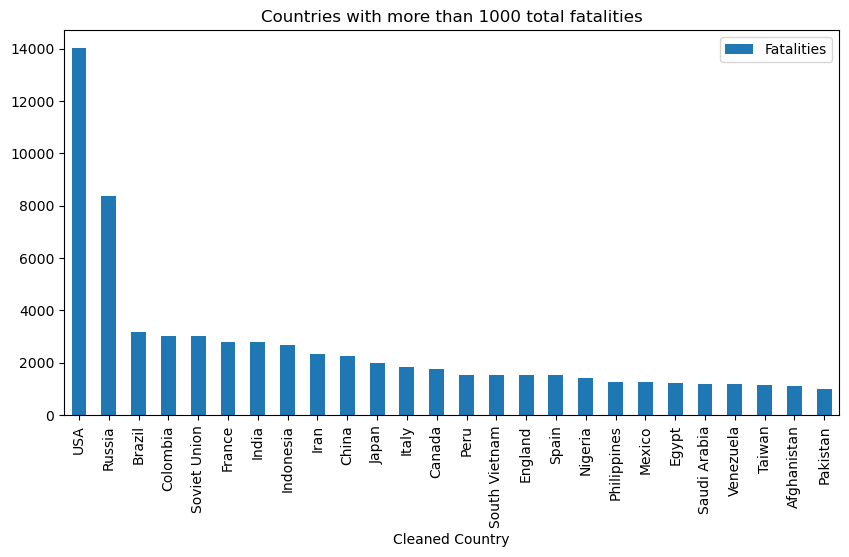

In [78]:
# Los países con más de 1000 fatalidades totales
s = df['Location'].str[0:].str.split(',', expand=True)
df['Country'] = s[3].fillna(s[2]).fillna(s[1]).str.strip()
usNames = ['Virginia','New Jersey','Ohio','Pennsylvania', 'Maryland', 'Indiana', 'Iowa',
          'Illinois','Wyoming', 'Minnisota', 'Wisconsin', 'Nevada', 'NY','California',
          'WY','New York','Oregon', 'Idaho', 'Connecticut','Nebraska', 'Minnesota', 'Kansas',
          'Texas', 'Tennessee', 'West Virginia', 'New Mexico', 'Washington', 'Massachusetts',
          'Utah', 'Ilinois','Florida', 'Michigan', 'Arkansas','Colorado', 'Georgia''Missouri',
          'Montana', 'Mississippi','Jersey', 'Cailifornia', 'Oklahoma','North Carolina',
          'Kentucky','Delaware','D.C.','Arazona','Arizona','South Dekota','New Hampshire','Hawaii',
          'Washingon','Massachusett','Washington DC','Tennesee','Deleware','Louisiana',
          'Massachutes', 'Louisana', 'New York (Idlewild)','Oklohoma','North Dakota','Rhode Island',
          'Maine','Wisconson','Calilfornia','Virginia','Virginia.','CA','Vermont',
          'HI','AK','IN','GA','Coloado','Airzona','Alabama', 'United States', 'Alaksa', 'Alaska', 'Alakska'
          ]

rusNames = ['Russian'] #Russia
sovNames = ['USSR'] #Soviet Union

clnames = []
for country in df['Country'].values:
    if country in rusNames:
         clnames.append('Russia')
    elif country in usNames:
        clnames.append('USA')
    elif country in sovNames:
        clnames.append('Soviet Union')
    else:
        clnames.append(country)
        
df['Cleaned Country'] = clnames        
fatal_countries = df[['Fatalities','Cleaned Country']].groupby(
    ['Cleaned Country']).sum().sort_values('Fatalities', ascending=False)
fatal_countries.reset_index(inplace = True)
fatal_countries[fatal_countries['Fatalities']>1000].plot(
    x='Cleaned Country', y='Fatalities', kind='bar', figsize=[10, 5], title='Countries with more than 1000 total fatalities')

##  Número Total de Muertes y Accidentes

<Axes: title={'center': 'Count of crashes by Decade'}, xlabel='Date', ylabel='Total crashes'>

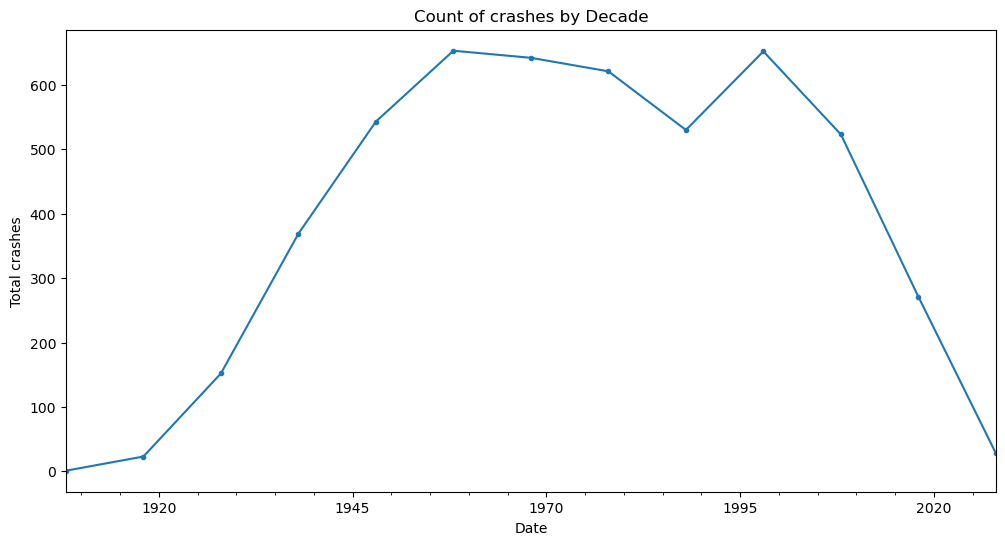

In [79]:
# Cantidad total de accidentes aéreos por década, lo que puede ayudar a identificar
# patrones o tendencias a lo largo del tiempo
df_date_index.resample('10y').size().plot(figsize=[12, 6],
                                          title='Count of crashes by Decade', ylabel='Total crashes', marker=".")

#  Fechas con mayor accidentes dentro del año

<Axes: title={'center': 'Count of crashes by date of the year'}>

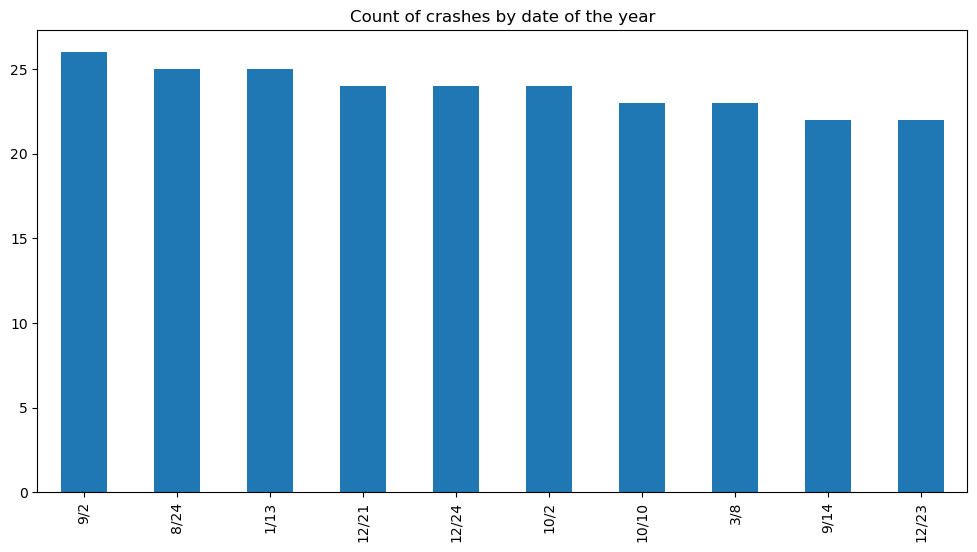

In [80]:
# Recuento de accidentes aéreos por fecha del año
df['Date of Year'].value_counts().head(10).plot(
    kind='bar',figsize=[12, 6], title='Count of crashes by date of the year')

#  Ubicación de los accidentes

<Axes: title={'center': 'Count of crashes by location'}>

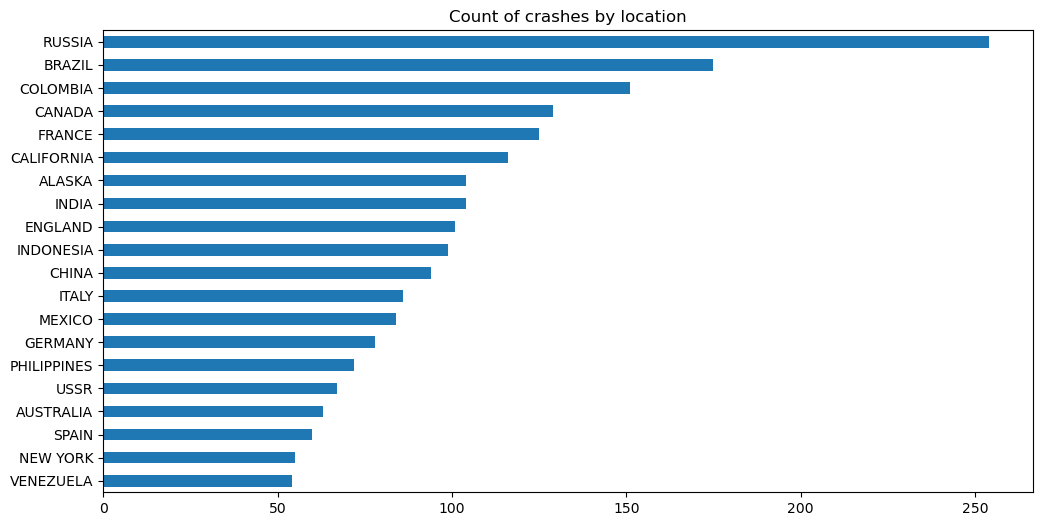

In [81]:
# Mayor cantidad de accidentes aéreos por ubicacion geografica
df['Location Country'].value_counts().head(20).sort_values().plot(
    kind='barh',figsize=[12, 6], title='Count of crashes by location')

Rusia es el país con la mayor cantidad de accidentes aéreos registrados en la muestra de datos. Esto puede atribuirse al hecho de que Rusia tiene una gran cantidad de vuelos comerciales y una infraestructura aeroportuaria extensa.

Otros países con un alto número de accidentes aéreos incluyen Brasil, Colombia, Canada ect. Estos países también tienen una actividad aérea significativa y pueden presentar desafíos geográficos o climáticos que afecten la seguridad de los vuelos.

Algunos países con menor cantidad de accidentes aéreos en la muestra de datos incluyen Australia, Reino Unido, Francia y Alemania. Estos países tienen sistemas de aviación bien establecidos y altos estándares de seguridad, lo que puede contribuir a una menor incidencia de accidentes aéreos.

# Personas a bordo en cada caso de fatalidad

<Axes: title={'center': 'How many people were on board in each Fatality'}>

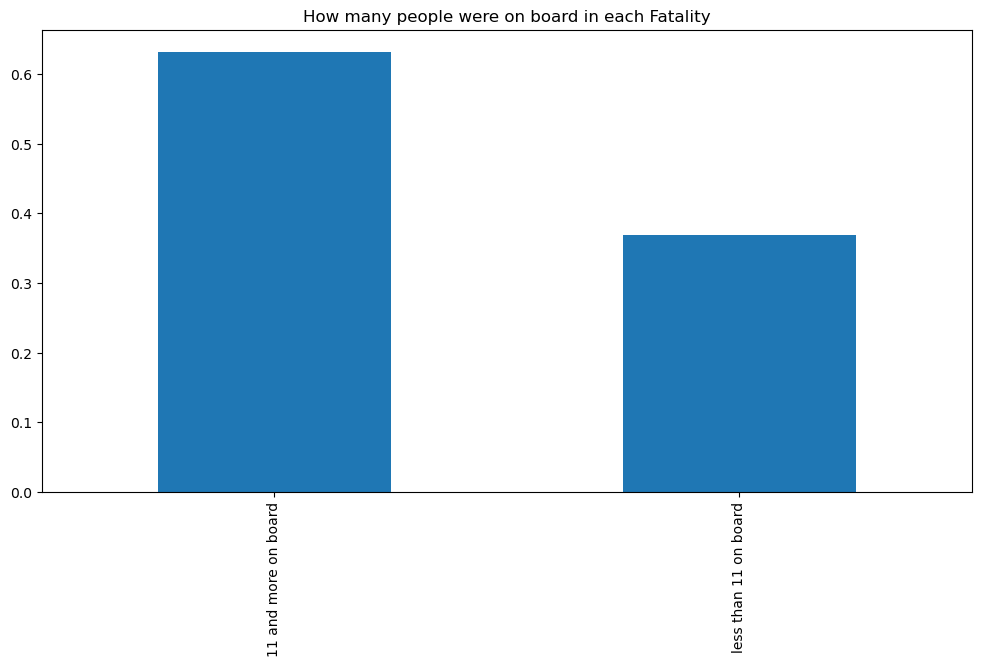

In [82]:
# El porcentaje de ocurrencia de la cantidad de personas a bordo 
# ('11 and more on board' y 'less than 11 on board') en relación con el número total de fatalidades
pd.Series(np.where
          ( df['Aboard'] > 10,'11 and more on board','less than 11 on board')).value_counts(
    normalize = True).plot(kind='bar', figsize=[12, 6], title='How many people were on board in each Fatality')

## PROMEDIO DE ACCIDENTES POR PAIS

In [83]:
# Rcuento de los tipos de accidentes aéreos en Rusia agregadas sobre la cantidad de personas 
#a bordo y el número de operadores únicos para los países con más accidentes aéreos
filter_country_RUSSIA = df['Location Country']=='RUSSIA'
df[filter_country_RUSSIA]['Type'].value_counts()
df.groupby(['Location Country']).agg({'Aboard':[np.mean, np.median,'count'],
                                     'Operator':['nunique']}).sort_values(by = ('Aboard','count'), ascending = False).head(20)

Aboard              Operator
                       mean median count  nunique
Location Country                                 
RUSSIA            41.842520   26.0   254       89
BRAZIL            25.919540   17.0   174       79
COLOMBIA          23.000000   15.0   151       94
CANADA            20.728682    7.0   129       92
FRANCE            27.508065   11.5   124       72
CALIFORNIA        29.568966   11.0   116       87
ALASKA            15.711538    6.0   104       82
INDIA             34.653846   16.5   104       44
ENGLAND           23.980198   13.0   101       59
INDONESIA         38.575758   18.0    99       44
CHINA             41.159091   23.5    88       33
ITALY             28.116279   19.5    86       58
MEXICO            19.702381   13.5    84       57
GERMANY           16.410256    7.5    78       38
PHILIPPINES       36.388889   25.5    72       35
USSR              54.089552   38.0    67       11
AUSTRALIA         11.096774    9.0    62       41
SPAIN             38.866667   11.0    60       37
NEW YORK          52.963636   25.0    55       37
VENEZUELA         25.222222   17.5    54       34

## RUSSIA

In [84]:
# Recuento de los operadores de vuelo asociados con los accidentes aéreos ocurridos en Rusia
filter_country_rusia = df['Location Country']=='RUSSIA'
filter_country_not_rusia = df['Location Country']!='RUSSIA'
df[filter_country_rusia]['Operator'].value_counts()

Aeroflot                                    150
Military - Russian Air Force                  8
Military - Russian Navy                       3
Military - Soviet Air Force                   2
Aeroflot / Aeroflot                           2
                                           ... 
Arsenyev Aviation Production Association      1
Cheremshanka Airlines                         1
Aeroflot Russian International Airways        1
North Western Air Transport                   1
Kamchatka Aviation Enterprise                 1
Name: Operator, Length: 89, dtype: int64

## BRAZIL

In [85]:
# Recuento de los operadores de vuelo asociados con los accidentes aéreos ocurridos en Brasil
filter_country_brazil = df['Location Country']=='BRAZIL'
filter_country_not_brazil = df['Location Country']!='BRAZIL'
df[filter_country_brazil]['Operator'].value_counts()

VASP                              20
Cruzeiro                          14
Varig                             12
Panair do Brasil                  11
Military - Brazilian Air Force    10
                                  ..
Sadia                              1
Paraense Transportes Aereos        1
Aeronorte                          1
Cia Brasiliera de Tratores         1
Heringer Taxi Aero                 1
Name: Operator, Length: 79, dtype: int64

# COLOMBIA

In [86]:
# Recuento de los operadores de vuelo asociados con los accidentes aéreos ocurridos en Colombia
filter_country_colombia = df['Location Country']=='COLOMBIA'
filter_country_not_colombia = df['Location Country']!='COLOMBIA'
df[filter_country_colombia]['Operator'].value_counts()

AVIANCA                    18
SATENA                      8
Aerosucre Colombia          5
LANSA                       4
Avianca                     3
                           ..
VIARCO                      1
Scarta                      1
Fuerza Aérea Colombiana     1
Aeroejecutivos Colombia     1
Laser Aereo Colombia        1
Name: Operator, Length: 94, dtype: int64

# PERU

In [87]:
# Recuento de los operadores de vuelo asociados con los accidentes aéreos ocurridos en Peru
filter_country_peru = df['Location Country']=='PERU'
filter_country_not_peru = df['Location Country']!='PERU'
df[filter_country_peru]['Operator'].value_counts()

Faucett                                   9
Fuerza Aérea del Peru                     5
Military - Peruvian Air Force             3
Expresso Aéreo                            2
Lineas Aereas Nacionales SA (Peru)        2
SATCO                                     2
Pan American Grace Airlines               2
Compania de Aviacion Faucett SA (Peru)    1
SA Amazonica                              1
Military - Peruvian Army Aviation         1
Aero Peru                                 1
Aeroperu                                  1
Aerochasqui                               1
Servicio Expresso Nacional                1
TAUSA                                     1
TANS Airlines                             1
Military - Fuerza Del Peru                1
Aero Condor                               1
TANS Peru                                 1
Military - Peruvian Air Force - TANS      1
Military - Fuerza Aérea del Peru          1
Peruvian Naval Aviation                   1
TAME                            

In [88]:
# # Promedio de ocurrencias con la empresa Faucett en Peru
df[filter_country_peru]['Operator'].str.contains('Faucett').mean()

0.18518518518518517

In [89]:
# Promedio de ocurrencias con la empresa Faucett fuera de Peru
df[filter_country_not_peru]['Operator'].str.contains('Faucett').mean()

0.00020185708518368994

In [90]:
# Aeronaves involucradas en el accidente
df[filter_country_peru]['Type'].value_counts()

Douglas DC-3                                7
de Havilland Canada DHC-6 Twin Otter 300    5
Yakovlev YAK-40                             2
Lockheed 188A Electra                       2
Douglas DC-4                                2
Fokker F-27 Friendship 400M                 2
Britten Norman BN-2A Trislander             1
de Havilland Canada DHC-5D Buffalo          1
Cessna 402C Utililiner                      1
Beech King Air B90                          1
CASA 212 Aviocar 200                        1
Fokker F-27 Friendship 500                  1
Ford 5-AT-C Tri-Motor                       1
Fokker F-28 Fellowship 1000                 1
Mil Mi-17                                   1
Boeing B-757-200                            1
Antonov AN-32                               1
Boeing B-737-282                            1
Fokker 28 Fellowship 1000                   1
Let 410UVP                                  1
Boeing B-737-244                            1
Boeing B-737-222                  

Podemos observar que el número de fatalidades por país se correlaciona con el número de accidentes en el mismo país.

#  Qué tipo de avión se accidento más veces

<Axes: >

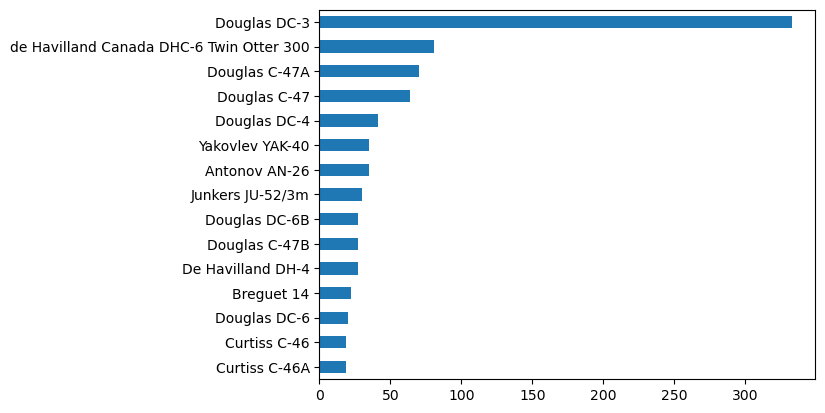

In [91]:
# Los 15 tipos de accidentes aéreos más frecuentes
df['Type'].value_counts().head(15).sort_values().plot.barh()

<Axes: >

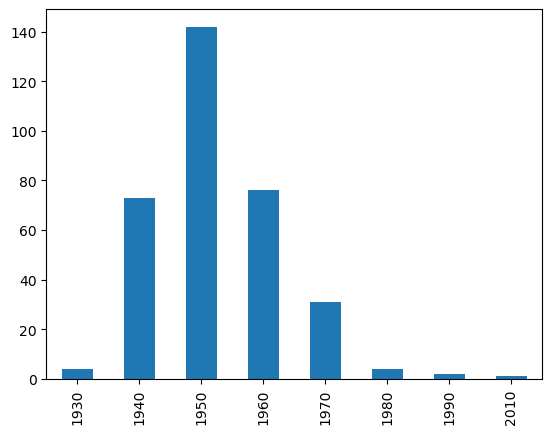

In [92]:
#  Número de accidentes por década en un gráfico
df[df['Type'] == 'Douglas DC-3']['Decade'].value_counts().sort_index().plot.bar()

El tipo de avión más accidentado de todos los tiempos es el Douglas DC-3. Su pico de accidentes ocurrió en la década de 1950. Ahora, casi no se produce ningún accidente, probablemente debido a una disminución en su uso desde la década de 1990

<Axes: >

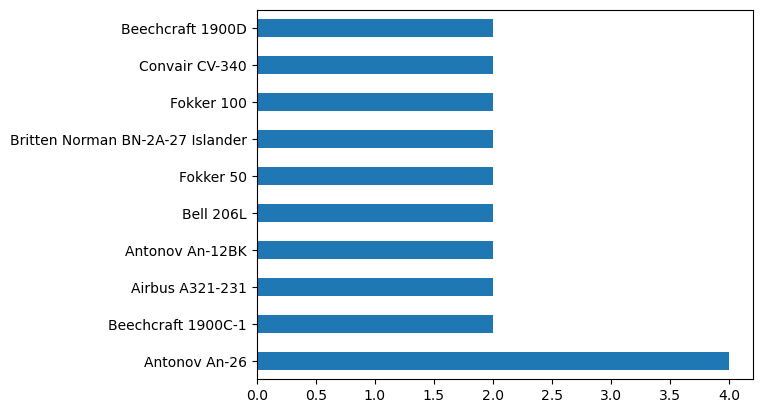

In [93]:
# Accidentes aéreos más frecuentes ocurridos en las últimas dos décadas (desde el año 2010 en adelante)
filter_last2_decade = df['Decade'] >=2010
df['Type'][filter_last2_decade].value_counts().head(10).plot.barh()

Desde 2010, el Antonov An-26 ha sido el que mas accidentes ah tenido.

# Exploring Military vs Passenger flights


# Cuántos aviones militares se accidentaron

<Axes: title={'center': 'Crashes by military'}>

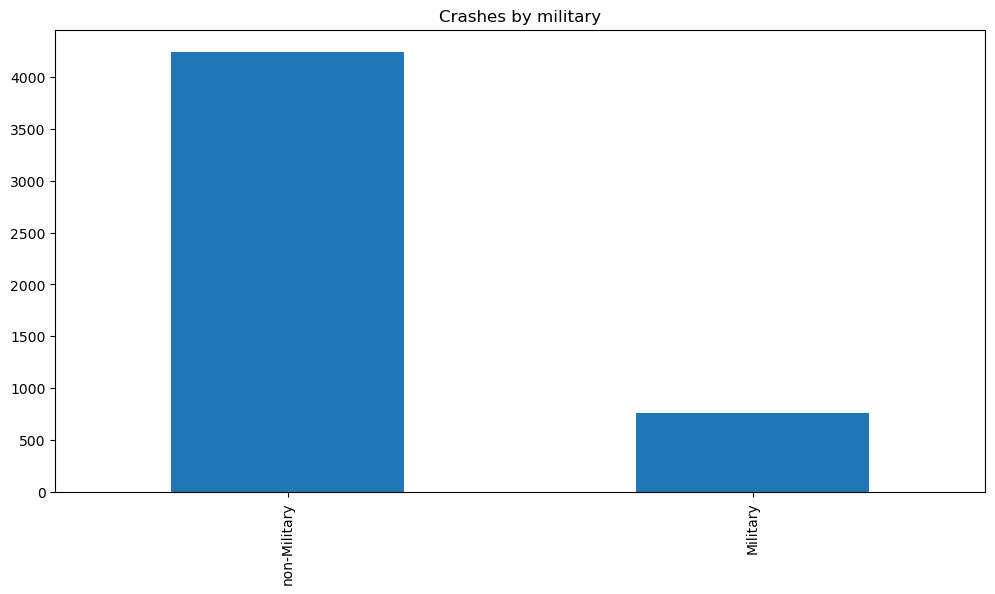

In [94]:
# Cantidad de accidentes aéreos clasificados como militares y no militares
pd.Series(np.where(df['Is Military'],'Military', 'non-Military')).value_counts().plot(
    kind='bar',figsize=[12, 6], title='Crashes by military')


Aproximadamente el 85% de los accidentes no son militares.


# Explorando los Operadores

# Qué Aerolinea tiene la mayor cantidad de aviones accidentados

In [95]:
# Operadores más frecuentes accidntados
df['Operator'].value_counts()

Aeroflot                            253
Military - U.S. Air Force           141
Air France                           74
Deutsche Lufthansa                   63
United Air Lines                     44
                                   ... 
Sierra Pacific Airlines               1
Pathet Lao Airlines                   1
Military - West German Air Force      1
Cessnyca                              1
Kamchatka Aviation Enterprise         1
Name: Operator, Length: 2268, dtype: int64


# Qué aerolinea tiene la mayor cantidad de fatales

<Axes: xlabel='Operator'>

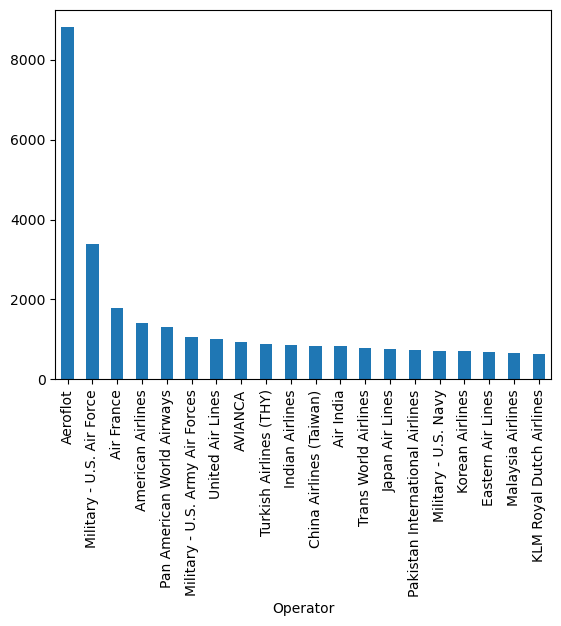

In [96]:
# Los 20 operadores con la mayor cantidad de fatalidades en los accidentes aéreos
df.groupby(['Operator'])['Fatalities'].sum().sort_values( ascending=False).head(20).plot.bar()

In [97]:
# Aerolineas con mayores números de fatalidades.
df.groupby(['Operator'])['Fatalities'].max().sort_values( ascending=False)

Operator
Pan American World Airways / KLM                583
Japan Air Lines                                 520
Saudi Arabian Airlines / Kazakhstan Airlines    349
Turkish Airlines (THY)                          346
Air India                                       329
                                               ... 
Ararat Avia                                       0
American International Airways                    0
Allied Air                                        0
Air Transat                                       0
Centurian Air Cargo                               0
Name: Fatalities, Length: 2268, dtype: int64


# Explorando la tasa de supervivencia.

# Tasa de supervivencia de los accidentes de avión

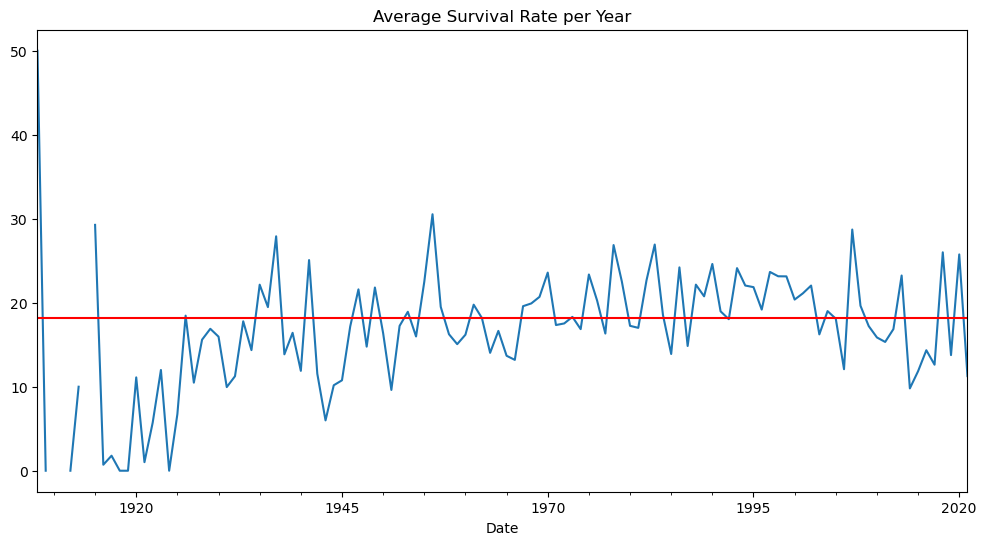

In [98]:
# La media del "Tasa de supervivencia" promedio por año
df_date_index["Survival Rate"].resample('1y').mean().plot(title="Average Survival Rate per Year", figsize=[12, 6])
plt.axhline(y=df["Survival Rate"].mean(), color='r', linestyle='-')

# Indice de Sobrevivientes

In [102]:
# Indice del accidente con la mayor cantidad de personas sobrevivientes
max_survive_index = df['Survived'].idxmax()
df.loc[max_survive_index]

Date                                                  1999-07-23 00:00:00
Location                                                     Tokyo, Japan
Operator                                               All Nippon Airways
Route                                       Tokyo, Japan - Chitose, Japan
Type                                                         Boeing B-747
Aboard                                                              517.0
Passengers_on_Board                                                   503
Crew_Aboard                                                            14
Fatalities                                                              1
Passenger_Fatalities                                                    0
Crew_Fatalities                                                         1
Ground                                                                  0
Summary                 Two minutes after taking off from Haneda Airpo...
DataTime                              

# Cuántos aviones se accidentaron durante la decada de los años 1910-1920

In [103]:
# La cantidad total de accidentes de aviación registrados durante la Primera Guerra Mundial.
df_filtered_WW1=df.query('Year>=1914 and Year<=1918')
crashed_by_year_WW1=df_filtered_WW1['Year'].groupby(df_filtered_WW1['Year']).count().sum()
crashed_by_year_WW1

18

# Aumento en los accidentes durante la decada de los 1910-1920

<Axes: xlabel='Year'>

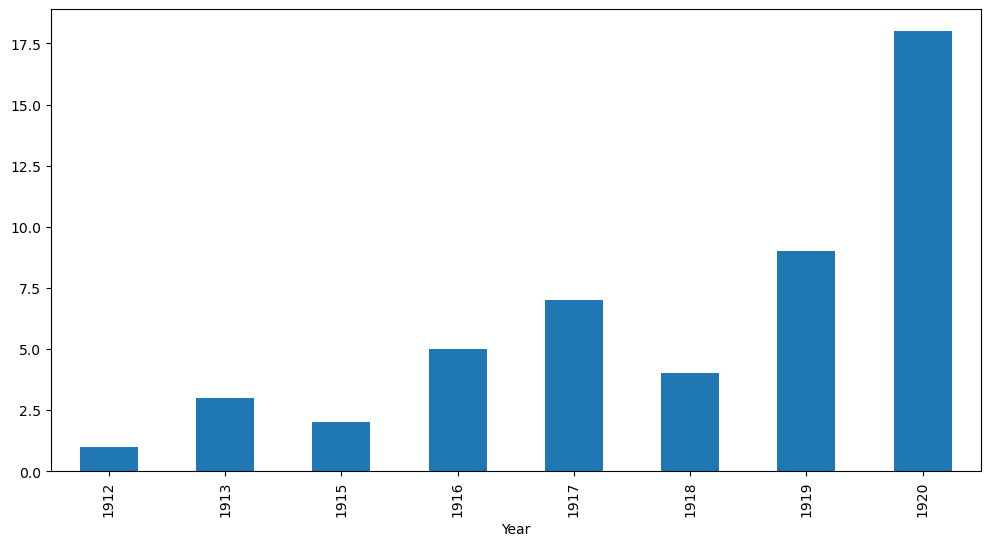

In [104]:
# Cantidad de accidentes aéreos por año en el rango de 1910 a 1920 (1ra Guerra Mundial)
crashed_by_year = df['Year'].groupby(df['Year']).count()
crashed_by_year.loc[1910:1920].plot(kind='bar', figsize=(12,6))

<Axes: title={'center': 'Military vs. not military'}>

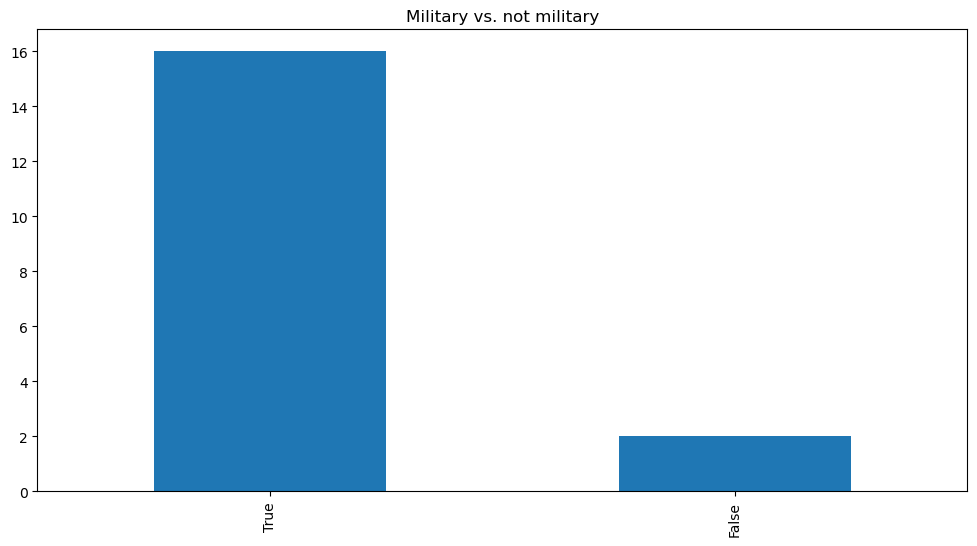

In [105]:
# Cantidad de accidentes aéreos filtrados durante la decada de 1910
df_filtered_WW1['Is Military'].value_counts().plot(kind='bar', figsize=[12, 6], title='Military vs. not military')

In [106]:
# Cantidad de accidentes aéreos asociados a cada operador durante la Primera Guerra Mundial
df_filtered_WW1.groupby('Operator')['Operator'].count()

Operator
Military - German Army     3
Military - German Navy    13
Not defined                1
US Aerial Mail Service     1
Name: Operator, dtype: int64

In [107]:
# Cantidad de accidentes aéreos por país durante la Primera Guerra Mundial
df_filtered_WW1.groupby('Cleaned Country')['Cleaned Country'].count().sort_values(ascending=False)

Cleaned Country
England      4
Germany      3
North Sea    3
Belgium      2
Bulgeria     1
France       1
USA          1
Name: Cleaned Country, dtype: int64

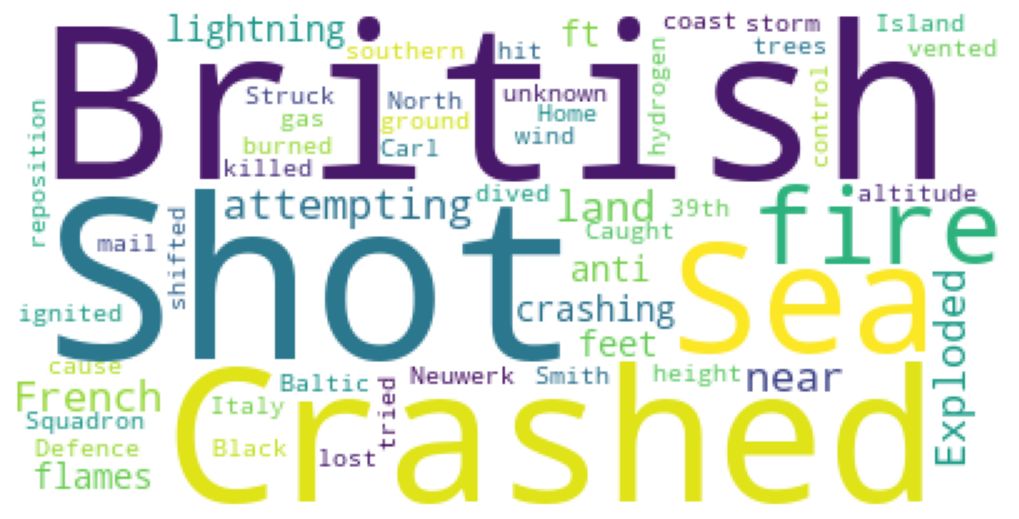

In [108]:
# Representación visual de las palabras más frecuentes en los resúmenes de los 
# accidentes de aviación que ocurrieron durante la Primera Guerra Mundial.
text1 = str(df_filtered_WW1.Summary.tolist())

stopwords1 = set(STOPWORDS)
stopwords1.add('aircraft')
stopwords1.add('plane')

wc1 = WordCloud(background_color="white", max_words=500,
               stopwords=stopwords1)
wc1.generate(text1)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wc1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [109]:
# Cantidad de veces que la columna 'Summary' contiene la palabra "British"
df_filtered_WW1['Summary'].str.contains('British').value_counts()

False    10
True      8
Name: Summary, dtype: int64

Las palabras 'disparo' y 'británico' aparecen con mayor frecuencia. La razón es que 8 de los 17 aviones que se estrellaron durante la Primera Guerra Mundial eran aviones alemanes disparados por aviones británicos.

In [141]:
df.head(50)

Date                             Location  \
0  1908-09-17                  Fort Myer, Virginia   
1  1909-09-07              Juvisy-sur-Orge, France   
2  1912-07-12            Atlantic City, New Jersey   
3  1913-08-06   Victoria, British Columbia, Canada   
4  1913-09-09                   Over the North Sea   
5  1913-10-17           Near Johannisthal, Germany   
6  1915-03-05                      Tienen, Belgium   
7  1915-09-03                Off Cuxhaven, Germany   
8  1916-07-28                Near Jambol, Bulgeria   
9  1916-09-24                  Billericay, England   
10 1916-10-01                 Potters Bar, England   
11 1916-11-21                       Mainz, Germany   
12 1916-11-28         Off West Hartlepool, England   
13 1917-03-04                   Near Gent, Belgium   
14 1917-03-30                 Off Northern Germany   
15 1917-05-14         Near Texel Island, North Sea   
16 1917-06-14       Off Vlieland Island, North Sea   
17 1917-06-17               Near Yarmouth, England   
18 1917-08-21                  Off western Denmark   
19 1917-10-20               Near Luneville, France   
20 1918-04-07               Over the Mediterranean   
21 1918-08-05        Off Helgoland Island, Germany   
22 1918-08-11            Ameland Island, North Sea   
23 1918-12-16                Elizabeth, New Jersey   
24 1919-05-25                      Cleveland, Ohio   
25 1919-07-19                Dix Run, Pennsylvania   
26 1919-07-21                    Chicago, Illinois   
27 1919-08-02                        Verona, Italy   
28 1919-10-02                   Newcastle, England   
29 1919-10-14               Cantonsville, Maryland   
30 1919-10-20  English Channel off Forkstone, Kent   
31 1919-10-30              Long Valley, New Jersey   
32 1919-12-11                Catherham, Surrey, UK   
33 1920-03-10                   New Paris, Indiana   
34 1920-03-30                   Newark, New Jersey   
35 1920-04-10                   Newark, New Jersey   
36 1920-04-11             Heller Field, New Jersey   
37 1920-05-12                      Oskaloosa, Iowa   
38 1920-06-06                      Cleveland, Ohio   
39 1920-07-20                  Cartagena, Columbia   
40 1920-08-16                     Bedford, England   
41 1920-08-16               College Park, Maryland   
42 1920-09-01               Morristown, New Jersey   
43 1920-09-15                    Pemberville, Ohio   
44 1920-09-27            Hillersburg, Pennsylvania   
45 1920-10-02             Off Port Vendres, France   
46 1920-10-05                      Valencia, Spain   
47 1920-10-15                    Batavia, Illinois   
48 1920-11-07                  Tie Siding, Wyoming   
49 1920-12-14                      London, England   

                                   Operator                Route  \
0                      Military - U.S. Army        Demonstration   
1                               Not defined             Air show   
2                      Military - U.S. Navy          Test flight   
3                                   Private          Not defined   
4                    Military - German Navy          Not defined   
5                    Military - German Navy          Not defined   
6                    Military - German Navy          Not defined   
7                    Military - German Navy          Not defined   
8                    Military - German Army          Not defined   
9                    Military - German Navy          Not defined   
10                   Military - German Navy          Not defined   
11                   Military - German Army          Not defined   
12                   Military - German Navy          Not defined   
13                   Military - German Army          Not defined   
14                   Military - German Navy          Not defined   
15                   Military - German Navy          Not defined   
16                   Military - German Navy          Not defined   
17                            

In [140]:
df.to_csv('Acc_Aereos_EDA.csv', index=False, encoding='utf-8')